Script to create triagle meshes with Mol*

Initial definitions and imports 

In [2]:
from shape_utils.pyFM_pdbe.mesh import TriMesh
from shape_utils.spectral_descr import calculate_descriptors
from shape_utils.utils import find_minimum_distance_meshes
from shape_utils.functional_maps import calculate_functional_maps
from shape_utils.similarity_scores import calculate_geodesic_norm_score
from shape_utils.pyFM_pdbe import functional 
import os
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import os

from shape_utils.pyFM_pdbe.mesh import TriMesh
from shape_utils.spectral_descr import calculate_descriptors
from shape_utils.functional_maps import calculate_functional_maps, calculate_functional_maps_chem
from shape_utils.pyFM_pdbe import functional 
from shape_utils.pyFM_pdbe import eval

import meshplot as mp


import pandas as pd
import seaborn as sns

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker



In [4]:


def diff_to_identity(matrix, threshold=0.02):
    # Convert the matrix to a numpy array for easier manipulation
    matrix = np.array(matrix)
    
    # Get the number of rows and columns in the matrix
    rows, cols = matrix.shape
    
    # Check if the matrix is square
    if rows != cols:
        return "Matrix is not square"
    
    # Create an identity matrix of the same size
    identity_matrix = np.eye(rows)
    
    # Calculate the element-wise absolute difference between the matrix and the identity matrix
    diff_matrix = np.abs(matrix - identity_matrix)

    return diff_matrix

import numpy as np

def similarity_to_diagonal(matrix):
    # Compute the Frobenius norm of the input matrix
    norm_original = np.linalg.norm(matrix)

    # Create a diagonal matrix with the same diagonal elements as the original matrix
    diagonal_matrix = np.diag(np.diag(matrix))

    # Compute the Frobenius norm of the diagonal matrix
    norm_diagonal = np.linalg.norm(diagonal_matrix)

    # Compute the similarity as the ratio of the norms
    similarity = norm_diagonal / norm_original

    return similarity

def get_non_diagonal_elements(matrix):
    non_diagonal_elements = []
    rows, cols = len(matrix), len(matrix[0])

    for i in range(rows):
        for j in range(cols):
            if i != j:  # Exclude diagonal elements                                                                                     
                non_diagonal_elements.append(matrix[i][j])

    return non_diagonal_elements

def percentage_close_to_identity(matrix, threshold=0.02):
    # Convert the matrix to a numpy array for easier manipulation
    matrix = np.array(matrix)
    
    # Get the number of rows and columns in the matrix
    rows, cols = matrix.shape
    
    # Check if the matrix is square
    if rows != cols:
        return "Matrix is not square"
    
    # Create an identity matrix of the same size
    identity_matrix = np.eye(rows)
    
    # Calculate the element-wise absolute difference between the matrix and the identity matrix
    diff_matrix = np.abs(matrix - identity_matrix)
    
    # Count the number of elements within the threshold
    close_elements_count = np.sum(diff_matrix < threshold)
    
    # Calculate the total number of elements in the matrix
    total_elements = rows * cols
    
    # Calculate the percentage of elements close to the identity matrix
    percentage_close = (close_elements_count / total_elements) * 100
    
    return percentage_close

def plot_array(values):
    plt.plot(values)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Plot of Array Values')
    plt.grid(True)
    plt.show()

def get_pairs(arr):
    pairs = []
    for i in range(len(arr)):
        for j in range(i, len(arr)):
            if i <= j:
                pairs.append((arr[i], arr[j]))
    return pairs
def get_pairs_two(array1, array2):
    pairs = []
    for item1 in array1:
        for item2 in array2:
            pairs.append((item1, item2))
    return pairs

In [2]:
import trimesh
from scipy.spatial import cKDTree
import trimesh
import numpy as np

def calculate_min_distance(vertices1,vertices2):

    # Build KD-tree for efficient nearest-neighbor search                                                                               
    tree = cKDTree(vertices2)

    # Query the nearest neighbor for each vertex in mesh1                                                                               
    distances, indices = tree.query(vertices1)

    # Find the index of the minimum distance                                                                                            
    min_index = np.argmin(distances)

    # Get the closest vertices                                                                                                          
    closest_vertex_mesh1 = vertices1[min_index]
    closest_vertex_mesh2 = vertices2[indices[min_index]]

    return distances[min_index], closest_vertex_mesh1, closest_vertex_mesh2
    


Compute spectral descriptors and functional maps 

In [46]:
from shape_utils.pyFM_pdbe.mesh import TriMesh
from shape_utils.spectral_descr import calculate_descriptors
from shape_utils.functional_maps import calculate_functional_maps, calculate_functional_maps_chem
from shape_utils.pyFM_pdbe import functional 

from shape_utils.pyFM_pdbe import eval



#file_mesh1 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/1jwp_trajectory/pockets_meshes/pockets_fixed/preprocessed_meshes/off_format/1jwp_11_p1_r.off'
#file_mesh2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/1jwp_trajectory/pockets_meshes/pockets_fixed/preprocessed_meshes/off_format/1jwp_11_p2_r.off'

file_mesh1 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/Sri_p2p_correspondances/meshes_off/1A3N.off'
file_mesh2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/Sri_p2p_correspondances/meshes_off/1C7B.off'

mesh1 = TriMesh(file_mesh1, area_normalize=True, center=False)
mesh2 = TriMesh(file_mesh2, area_normalize=True, center=False)

model = functional.FunctionalMapping(mesh1,mesh2) 

neigvecs = 200
ndescr = 50
step = 1
n_ev = 50
output = './example_data/'
descr = 'WKS'
landmarks = None

descr1,descr2,paramlist = calculate_descriptors(model,neigvecs,n_ev,ndescr,step,landmarks,output,descr)
p2p_21,FM = calculate_functional_maps(model,n_cpus=8,refine= None)

sim_score = calculate_geodesic_norm_score(FM)
min_dist = find_minimum_distance_meshes(mesh1,mesh2)
print('similarity score:', sim_score)
print('minimum distance:', min_dist)

min_distance, vertex1,vertex2 = calculate_min_distance(mesh1.vertlist ,mesh2.vertlist)
print(mesh1.vertlist[0])
print(min_distance,vertex1,vertex2)


Computing Laplacian spectrum
Computing 200 eigenvectors
	Done in 16.71 s
Computing 200 eigenvectors
	Done in 16.74 s

Computing descriptors
Finished analysis of descriptors in 3.4963538646698 seconds
	Normalizing descriptors

	50 out of 50 possible descriptors kept
cpus used 8
Computing commutativity operators
	Scaling LBO commutativity weight by 2.9e-09

Optimization :
	50 Ev on source - 50 Ev on Target
	Using 50 Descriptors
	Hyperparameters :
		Descriptors preservation :1.0e+00
		Descriptors commutativity :1.0e-01
		Laplacian commutativity :1.0e-02
		Orientation preservation :0.0e+00

	Task : CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH, funcall : 159, nit : 153, warnflag : 0
	Done in 1.23 seconds
similarity score: 19.44050957202163
minimum distance: 0.00016442143376246867
[-0.09087083 -0.01098838 -0.15853496]
0.00016442143376246867 [-0.07868501 -0.1146248  -0.03716434] [-0.07873107 -0.11477903 -0.03719791]


Plot point to point maps and correspondance matrix

<AxesSubplot:>

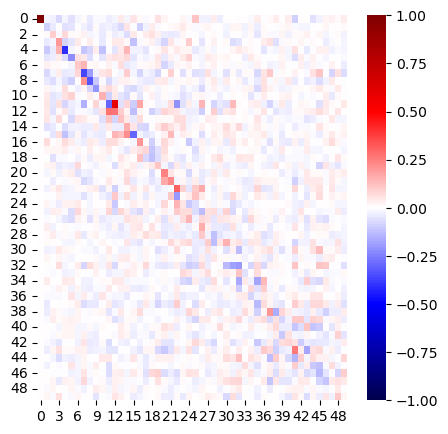

In [47]:
import meshplot as mp
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt


def plot_mesh(myMesh,cmap=None):
   mp.plot(myMesh.vertlist, myMesh.facelist,c=cmap)
    
def double_plot(myMesh1,myMesh2,cmap1=None,cmap2=None):
    d = mp.subplot(myMesh1.vertlist,myMesh1.facelist, c=cmap1[:,1],s=[2, 2, 0])
    mp.subplot(myMesh2.vertlist, myMesh2.facelist, c=cmap2[:,1], s=[2, 2, 1], data=d)

def visu(vertices):
    min_coord,max_coord = np.min(vertices,axis=0,keepdims=True),np.max(vertices,axis=0,keepdims=True)
    cmap = (vertices-min_coord)/(max_coord-min_coord)
    return cmap
cmap1 = visu(mesh1.vertlist); cmap2 = cmap1[p2p_21]
double_plot(mesh1,mesh2,cmap1,cmap2)
fig, (ax1) = plt.subplots(1, figsize=(5, 5))
sns.heatmap(FM,ax=ax1,vmax=1.0,vmin=-1.0,cmap='seismic')

Compute symetric matrix of scores and volumes per pocket

In [5]:
def compute_scores_sym_matrix(scores_file, list_entries_file):
    scores_file=open(scores_file)
    scores_entries = scores_file.read().splitlines()
    entries_file = open(list_entries_file)
    entry_labels = entries_file.read().splitlines()
    
    #Derive dimension of the score matrix from the list of points
    dim = len(entry_labels)
    #Read list of elements and compute pairs 
    pairs_entries = get_pairs (entry_labels)
    print(entry_labels)
    print(len(pairs_entries))
    axes_labels = []
    for label in entry_labels:
        axes_labels.append(label)

    scores = []

    for j in pairs_entries:
        j_inv = (j[1],j[0])
        for line in scores_entries:
            p = line.split()
            pair_score = (p[0],p[1])
            score = p[2] 
            if j==pair_score or j_inv==pair_score:
                scores.append(score)
    sym_matrix = np.zeros((dim, dim))
    row, col = np.triu_indices(dim)  # Upper triangular indices
    sym_matrix[row, col] = scores
    sym_matrix[col, row] = scores
   
    print(len(scores))
    return sym_matrix, axes_labels
    
def compute_volumes_pockets(volumes_file, list_entries):
    volumes_file = open(volumes_file)
    volumes_pockets = volumes_file.read().splitlines()
    entry_labels = list_entries
    
    #Derive dimension of the score matrix from the list of points
    dim = len(entry_labels)
    
    axes_labels = []
    for label in entry_labels:
        axes_labels.append(label)

    vol_pockets = []

    for j in entry_labels:
        for line in volumes_pockets:
            p = line.split()
            pocket_entry = p[0]
            pocket_volume = p[1] 
            if j==pocket_entry :
                vol_pockets.append((pocket_entry,pocket_volume))   

    return vol_pockets



Computing minimum distance matrix between pockets

38.75483302904411
38.75483302904411


<AxesSubplot:>

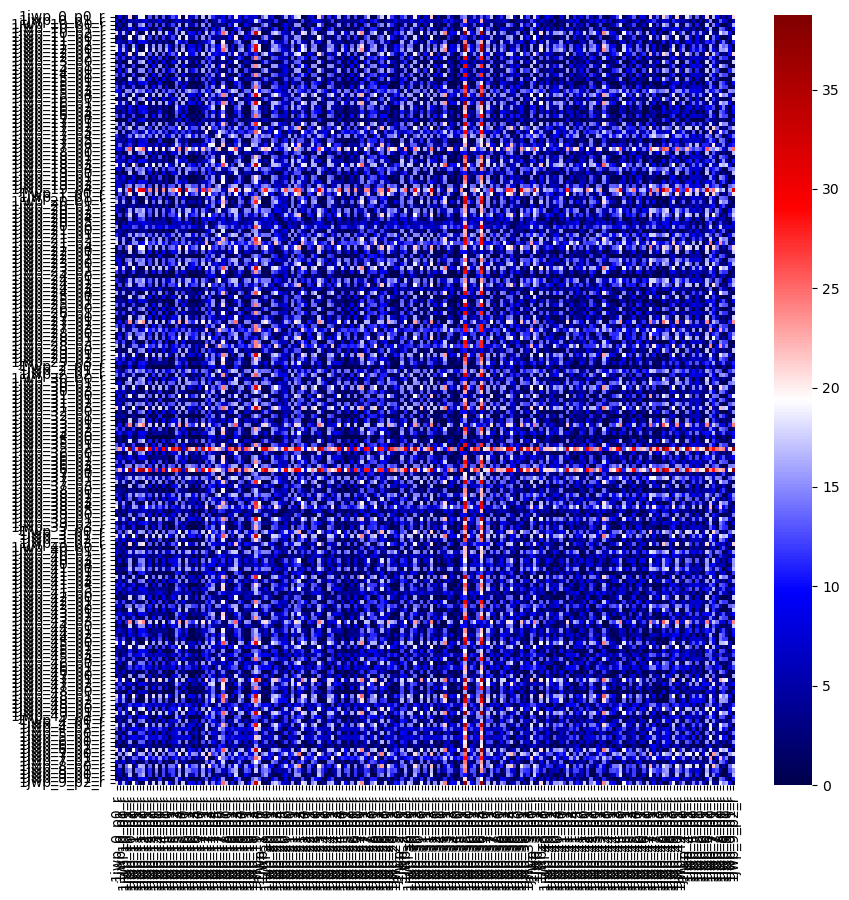

In [ ]:

scores_file_min_dist = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/1jwp_trajectory/pockets_meshes/pockets_fixed/preprocessed_meshes/off_format/entry_pairs_min_dist.txt'
list_entries = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/1jwp_trajectory/pockets_meshes/pockets_fixed/preprocessed_meshes/off_format/list_entries.txt')
entry_labels = list_entries.read().splitlines()
sym_matrix_min_dist, axes_labels = compute_scores_sym_matrix(scores_file_min_dist, entry_labels)
print(sym_matrix_min_dist.max())
score_max = sym_matrix_min_dist.max() 
print(score_max)
fig, (ax1) = plt.subplots(1, figsize=(10, 10))
sns.heatmap(sym_matrix_min_dist,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)



Getting score matrix from Spectral descriptors score list 

<AxesSubplot:>

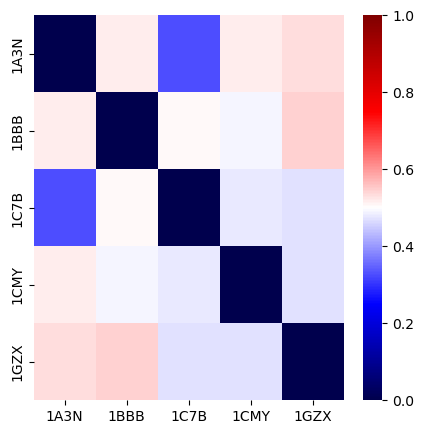

In [68]:

#scores_file_spectral = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/1jwp_trajectory/pockets_meshes/pockets_fixed/preprocessed_meshes/off_format/entries_scores_sorted.txt')
#list_entries = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/1jwp_trajectory/pockets_meshes/pockets_fixed/preprocessed_meshes/off_format/list_entries.txt')

scores_file_spectral = '/Users/gdiazleines/results/shape-retrieval/benchmarking/Sri_p2p_correspondances/entry_pairs_scores.txt'
list_entries = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/Sri_p2p_correspondances/list_entries.txt')
entry_labels = list_entries.read().splitlines()
sym_matrix_spectral, axes_labels = compute_scores_sym_matrix(scores_file_spectral, entry_labels)
score_max = 50.0 
#score_max = sym_matrix_spectral.max() 
fig, (ax1) = plt.subplots(1, figsize=(5, 5))
norm_matrix_spectral = sym_matrix_spectral/score_max
sns.heatmap(sym_matrix_spectral/score_max,ax=ax1,vmin=0.0,vmax=1.0,cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)



Getting score matrix from Zernike descriptors usins scores list

In [ ]:

scores_file_zernike = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/1jwp_trajectory/pockets_meshes/pockets_fixed/preprocessed_meshes/ply_format/output/fullatom_prediction.txt')
list_entries = open('/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/1jwp_trajectory/pockets_meshes/pockets_fixed/preprocessed_meshes/off_format/list_entries.txt')

sym_matrix_zernike, axes_labels = compute_scores_sym_matrix(scores_file_zernike, list_entries)
score_max = sym_matrix_min_dist.max() 
fig, (ax1) = plt.subplots(1, figsize=(10, 10))
sns.heatmap(sym_matrix_min_dist,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)





Agglomerative clustering 

In [6]:

from scipy.linalg import norm
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster


from scipy.cluster.hierarchy import dendrogram, from_mlab_linkage, cut_tree, leaves_list, set_link_color_palette, to_tree, fcluster
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import silhouette_samples
import scipy.stats as st
import json
import operator
import pandas as pd
import itertools

def linkage_matrix(model):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix
    # Plot the corresponding dendrogram
    #dendrogram(linkage_matrix, **kwargs)

def two_gap_diff_stat(model, max_k,dist):
    clusters = linkage_matrix(model)
    dist = pd.DataFrame(dist)
    # cluster levels over from 1 to N-1 clusters
    cluster_lvls = pd.DataFrame(cut_tree(clusters))
    num_k = cluster_lvls.columns  # save column with number of clusters
    # reverse order to start with 1 cluster
    cluster_lvls = cluster_lvls.iloc[:, ::-1]
    cluster_lvls.columns = num_k  # set columns to number of cluster
    W_list = []

    # get within-cluster dissimilarity for each k
    for k in range(min(len(cluster_lvls.columns), max_k)):
        level = cluster_lvls.iloc[:, k]  # get k clusters
        D_list = []  # within-cluster distance list

        for i in range(np.max(level.unique()) + 1):
            cluster = level.loc[level == i]
            # Based on correlation distance
            cluster_dist = dist.loc[cluster.index,
                                    cluster.index]  # get distance
            cluster_pdist = squareform(cluster_dist, checks=False)
            if cluster_pdist.shape[0] != 0:
                D = np.nan_to_num(cluster_pdist.mean())
                D_list.append(D)  # append to list

        W_k = np.sum(D_list)
        W_list.append(W_k)

    W_list = pd.Series(W_list)
    n = dist.shape[0]
    limit_k = int(min(max_k, np.sqrt(n)))
    gaps = W_list.shift(2) + W_list - 2 * W_list.shift(1)
    gaps = gaps[0:limit_k]
    if gaps.isna().all():
        k = len(gaps)
    else:
        k = int(gaps.idxmax() + 2)

    return k


def std_silhouette_score(model, max_k,dist):
    clusters = linkage_matrix(model)
    dist = pd.DataFrame(dist)
    # cluster levels over from 1 to N-1 clusters
    cluster_lvls = pd.DataFrame(cut_tree(clusters))
    num_k = cluster_lvls.columns  # save column with number of clusters
    # reverse order to start with 1 cluster
    cluster_lvls = cluster_lvls.iloc[:, ::-1]
    cluster_lvls.columns = num_k  # set columns to number of cluster
    scores_list = []

    # get within-cluster dissimilarity for each k
    for k in range(2, min(len(cluster_lvls.columns), max_k)):
        level = cluster_lvls.iloc[:, k]  # get k clusters
        b = silhouette_samples(dist, level)
        scores_list.append(b.mean() / b.std())

    scores_list = pd.Series(scores_list)
    n = dist.shape[0]
    limit_k = int(min(max_k, np.sqrt(n)))
    scores_list = scores_list[0:limit_k]
    if scores_list.isna().all():
        k = len(scores_list)
    else:
        k = int(scores_list.idxmax() + 2)

    return k


def find_optimal_num_clusters(model, dist, max_k=10, ktype="d",k=None):
    if k is None:
        if ktype == "s":
            k = std_silhouette_score(model, max_k,dist)
        else:
            k = two_gap_diff_stat(model, max_k,dist)

    return k

def compute_clusters(sym_matrix,threshold,axes_labels,cluster):
    average_linkage_average = cluster.AgglomerativeClustering(
        linkage='ward',
        #metric = 'precomputed',
        compute_distances = True,
        compute_full_tree = True, 
        distance_threshold = threshold,
        n_clusters= None,
    )

    clustering_av = average_linkage_average.fit(sym_matrix)
    k = clustering_av.n_clusters_

    #print('no. of clusters',clusters)

    plt.title("Hierarchical Clustering Dendrogram")
    # plot the top three levels of the dendrogram
    link_matrix = linkage_matrix(clustering_av)



    #k = find_optimal_num_clusters(clustering_av, sym_matrix_min_dist,max_k=1000, ktype="d", k=None)
    clustering_inds = fcluster(link_matrix, k, criterion="maxclust")
    clusters = {i: [] for i in range(min(clustering_inds), max(clustering_inds) + 1)}
    for i, v in enumerate(clustering_inds):
        clusters[v].append(i)

    clusters_all = []
    for i in range(1,len(clusters)+1):
        #print('cluster no.', i)
        cluster_entries = []
        cluster = clusters[i]
        for j in cluster:
            #print(axes_labels[j])
            cluster_entries.append(axes_labels[j])  
        clusters_all.append(cluster_entries)
    print('optimal number of clusters',k)
    dendrogram(link_matrix,truncate_mode = "level", p=50,labels=axes_labels)
    plt.show()
    return clusters_all


optimal number of clusters 1


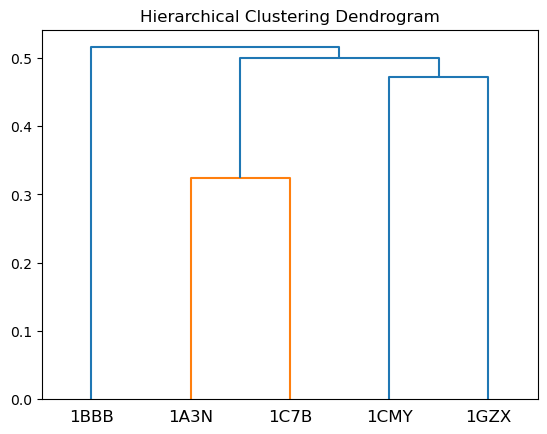

In [69]:
threshold = 1.0
clusters_all_pockets=compute_clusters(norm_matrix_spectral, threshold,axes_labels,cluster)


Identifying different pockets by clustering with a minimum distance score

optimal number of clusters 3


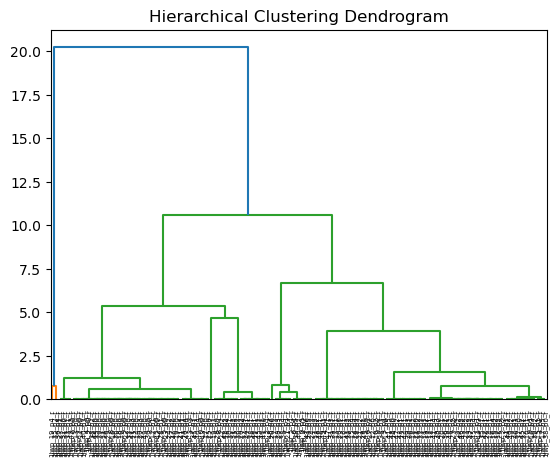

In [35]:
threshold = 7.5
clusters_all_pockets=compute_clusters(sym_matrix_min_dist, threshold,axes_labels,cluster)


Volumes per cluster/pocket

In [36]:
volumes_file = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/1jwp_trajectory/all_pockets_volumes_r.txt'
pockets_volumes = []
for i in range(len(clusters_all_pockets)):
    pocket_name = 'pocket_{}'.format(i)
    pocket_volumes= compute_volumes_pockets(volumes_file, clusters_all_pockets[i])
    pockets_volumes.append(pocket_volumes)
    for pocket in pocket_volumes:
        print(i,pocket[0],pocket[1])

print(pockets_volumes)

0 1jwp_19_p4_r 274.2999406926667
0 1jwp_35_p2_r 210.13471926233333
0 1jwp_36_p4_r 223.98297682599997
1 1jwp_0_p0_r 382.17526732399995
1 1jwp_10_p0_r 1327.3418089731663
1 1jwp_11_p0_r 971.4648035335
1 1jwp_12_p1_r 241.60918638150002
1 1jwp_13_p0_r 899.2018701233334
1 1jwp_14_p0_r 1767.3186583613328
1 1jwp_15_p0_r 1484.9998159185
1 1jwp_15_p3_r 228.3302266258333
1 1jwp_16_p0_r 1401.0865371235
1 1jwp_17_p0_r 718.4580365286666
1 1jwp_17_p2_r 558.1797241268332
1 1jwp_17_p4_r 392.14008469066664
1 1jwp_17_p7_r 203.92267886683334
1 1jwp_18_p0_r 1143.0091612915
1 1jwp_18_p4_r 282.4304390243333
1 1jwp_19_p0_r 1103.6640723964997
1 1jwp_19_p3_r 295.76986138533323
1 1jwp_1_p0_r 407.7339613096666
1 1jwp_20_p2_r 447.01695736
1 1jwp_20_p3_r 408.55534497516675
1 1jwp_20_p4_r 299.9756637341667
1 1jwp_21_p1_r 570.786380519
1 1jwp_21_p4_r 241.0358169483333
1 1jwp_22_p0_r 1136.6116438058334
1 1jwp_22_p2_r 220.440063243
1 1jwp_23_p0_r 502.2225258604999
1 1jwp_24_p1_r 666.8135969999998
1 1jwp_24_p2_r 428.969

Run shape analysis for each cluster/pocket

optimal number of clusters 2


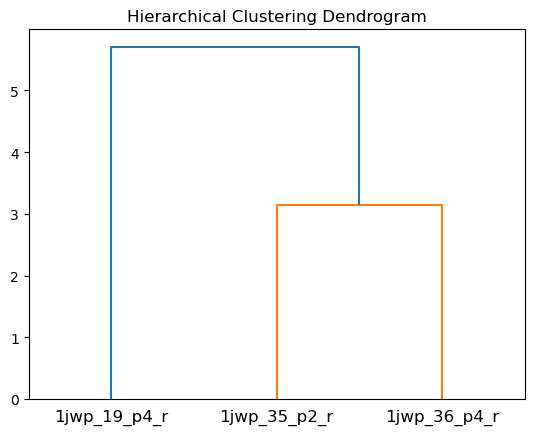

pocket_0
shape_cluster_0
1jwp_19_p4_r
1jwp_35_p2_r
1jwp_36_p4_r
optimal number of clusters 2


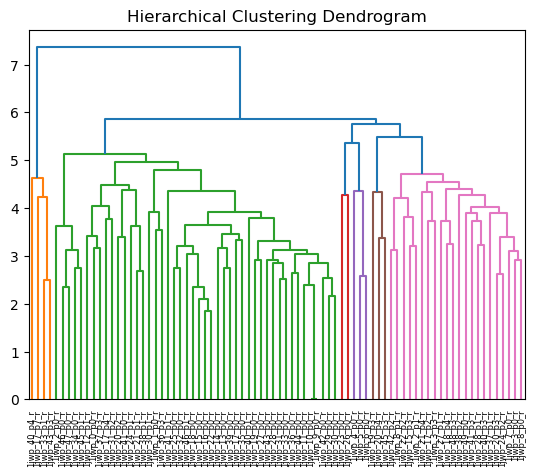

pocket_1
shape_cluster_0
1jwp_17_p7_r
1jwp_33_p1_r
1jwp_40_p4_r
1jwp_43_p3_r
shape_cluster_1
1jwp_0_p0_r
1jwp_10_p0_r
1jwp_11_p0_r
1jwp_12_p1_r
1jwp_13_p0_r
1jwp_14_p0_r
1jwp_15_p0_r
1jwp_15_p3_r
1jwp_16_p0_r
1jwp_17_p0_r
1jwp_17_p2_r
1jwp_17_p4_r
1jwp_18_p0_r
1jwp_18_p4_r
1jwp_19_p0_r
1jwp_19_p3_r
1jwp_1_p0_r
1jwp_20_p2_r
1jwp_20_p3_r
1jwp_20_p4_r
1jwp_21_p1_r
1jwp_21_p4_r
1jwp_22_p0_r
1jwp_22_p2_r
1jwp_23_p0_r
1jwp_24_p1_r
1jwp_24_p2_r
1jwp_25_p0_r
1jwp_26_p0_r
1jwp_27_p0_r
1jwp_27_p1_r
1jwp_28_p0_r
1jwp_28_p1_r
1jwp_29_p0_r
1jwp_2_p0_r
1jwp_2_p1_r
1jwp_30_p0_r
1jwp_30_p1_r
1jwp_31_p0_r
1jwp_31_p2_r
1jwp_32_p0_r
1jwp_33_p0_r
1jwp_34_p0_r
1jwp_35_p0_r
1jwp_36_p0_r
1jwp_36_p3_r
1jwp_37_p1_r
1jwp_37_p3_r
1jwp_38_p1_r
1jwp_38_p2_r
1jwp_39_p0_r
1jwp_3_p0_r
1jwp_3_p3_r
1jwp_40_p1_r
1jwp_40_p3_r
1jwp_41_p0_r
1jwp_41_p1_r
1jwp_41_p3_r
1jwp_42_p0_r
1jwp_42_p2_r
1jwp_43_p0_r
1jwp_44_p0_r
1jwp_45_p1_r
1jwp_45_p3_r
1jwp_46_p0_r
1jwp_46_p1_r
1jwp_47_p0_r
1jwp_48_p3_r
1jwp_49_p0_r
1jwp_4_p0_r
1jwp

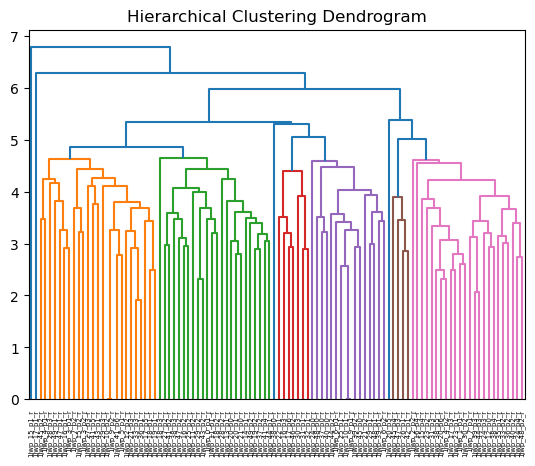

pocket_2
shape_cluster_0
1jwp_0_p1_r
1jwp_10_p1_r
1jwp_10_p2_r
1jwp_11_p1_r
1jwp_11_p2_r
1jwp_12_p2_r
1jwp_13_p1_r
1jwp_14_p1_r
1jwp_15_p2_r
1jwp_16_p1_r
1jwp_16_p2_r
1jwp_16_p3_r
1jwp_17_p5_r
1jwp_17_p6_r
1jwp_18_p1_r
1jwp_18_p2_r
1jwp_18_p3_r
1jwp_19_p1_r
1jwp_19_p2_r
1jwp_20_p0_r
1jwp_20_p1_r
1jwp_21_p0_r
1jwp_21_p2_r
1jwp_21_p3_r
1jwp_22_p1_r
1jwp_24_p0_r
1jwp_25_p1_r
1jwp_25_p2_r
1jwp_27_p2_r
1jwp_27_p3_r
1jwp_28_p2_r
1jwp_28_p3_r
1jwp_29_p1_r
1jwp_29_p2_r
1jwp_29_p3_r
1jwp_30_p3_r
1jwp_31_p1_r
1jwp_32_p1_r
1jwp_33_p3_r
1jwp_36_p1_r
1jwp_37_p0_r
1jwp_37_p2_r
1jwp_38_p0_r
1jwp_38_p3_r
1jwp_39_p1_r
1jwp_39_p2_r
1jwp_3_p1_r
1jwp_3_p2_r
1jwp_40_p0_r
1jwp_41_p2_r
1jwp_41_p4_r
1jwp_41_p5_r
1jwp_41_p6_r
1jwp_43_p1_r
1jwp_43_p2_r
1jwp_44_p1_r
1jwp_44_p2_r
1jwp_45_p0_r
1jwp_45_p2_r
1jwp_46_p2_r
1jwp_47_p1_r
1jwp_47_p2_r
1jwp_48_p0_r
1jwp_48_p1_r
1jwp_49_p1_r
1jwp_49_p2_r
1jwp_4_p1_r
1jwp_5_p1_r
1jwp_6_p1_r
1jwp_6_p2_r
1jwp_7_p2_r
1jwp_9_p1_r
1jwp_9_p2_r
shape_cluster_1
1jwp_12_p0_r
1jwp_15

In [37]:
sym_matrices_pockets_zernike = []
shape_clusters_pockets = []
labels_clusters=[]
scores_zernike_file = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/1jwp_trajectory/pockets_meshes/pockets_fixed/preprocessed_meshes/ply_format/output/fullatom_prediction.txt'
scores_spectral_file = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/1jwp_trajectory/pockets_meshes/pockets_fixed/preprocessed_meshes/off_format/entries_scores_sorted.txt'
for i in range(len(clusters_all_pockets)):
    sym_matrix_zernike_pocket, axes_labels_pocket = compute_scores_sym_matrix(scores_zernike_file, clusters_all_pockets[i])
    sym_matrix_spectral_pocket, axes_labels_pocket = compute_scores_sym_matrix(scores_spectral_file, clusters_all_pockets[i])
    sym_matrices_pockets_zernike.append(sym_matrix_zernike_pocket)
    score_max = sym_matrix_zernike_pocket.max()
    threshold= 0.6*score_max
    threshold_spectral = 30.0
    labels_clusters.append(axes_labels_pocket)
    
    shape_clusters_pocket_zernike=compute_clusters(sym_matrix_zernike_pocket, threshold,axes_labels_pocket,cluster)   
    shape_clusters_pockets.append(shape_clusters_pocket_zernike)
    print('pocket_{}'.format(i))
    for j in range(len(shape_clusters_pocket_zernike)):
        print('shape_cluster_{}'.format(j))
        for entry in shape_clusters_pocket_zernike[j]: 
            print(entry)
    #shape_clusters_pockets_spectral=compute_clusters(sym_matrix_spectral_pocket, threshold_spectral,axes_labels_pocket,cluster)   
    #print('pocket_{}'.format(i))
    #for j in range(len(shape_clusters_pockets_spectral)):
    #    print('shape_cluster_spectral{}'.format(j))
    #    for entry in shape_clusters_pockets_spectral[j]: 
    #        print(entry)
    


In [208]:
print(shape_clusters_pockets)

volumes_file = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/1jwp_trajectory/all_pockets_volumes_r.txt'
pockets_shape_volumes = []
shape_cluster_pocket = shape_clusters_pockets[2]
for i in range(len(shape_cluster_pocket)):
    pocket_shape_volumes= compute_volumes_pockets(volumes_file, shape_cluster_pocket[i])
    print('shape_cluster_{}'.format(i))
    pockets_shape_volumes.append(pocket_shape_volumes)
    for pocket in pocket_shape_volumes:
        print(i,pocket[0],pocket[1])

#print(pockets_volumes)

[[['1jwp_27_p1_r', '1jwp_3_p3_r', '1jwp_40_p4_r']], [['1jwp_17_p2_r', '1jwp_1_p0_r', '1jwp_20_p3_r', '1jwp_21_p4_r', '1jwp_24_p2_r', '1jwp_3_p0_r', '1jwp_40_p3_r', '1jwp_49_p0_r', '1jwp_7_p0_r', '1jwp_8_p0_r'], ['1jwp_0_p0_r', '1jwp_12_p1_r', '1jwp_20_p4_r', '1jwp_37_p3_r'], ['1jwp_45_p1_r']], [['1jwp_13_p1_r', '1jwp_14_p1_r', '1jwp_20_p0_r', '1jwp_28_p2_r', '1jwp_37_p2_r'], ['1jwp_10_p2_r', '1jwp_12_p0_r', '1jwp_18_p3_r', '1jwp_9_p2_r'], ['1jwp_16_p1_r', '1jwp_3_p1_r', '1jwp_47_p1_r', '1jwp_49_p1_r', '1jwp_4_p1_r'], ['1jwp_11_p2_r', '1jwp_38_p3_r', '1jwp_41_p2_r'], ['1jwp_21_p2_r', '1jwp_29_p1_r', '1jwp_39_p1_r', '1jwp_40_p0_r', '1jwp_45_p0_r', '1jwp_48_p1_r', '1jwp_6_p2_r'], ['1jwp_15_p4_r', '1jwp_23_p1_r', '1jwp_30_p2_r', '1jwp_31_p3_r'], ['1jwp_17_p1_r']], [['1jwp_16_p4_r', '1jwp_1_p1_r', '1jwp_23_p2_r', '1jwp_24_p4_r', '1jwp_26_p1_r', '1jwp_2_p2_r', '1jwp_33_p2_r', '1jwp_35_p1_r', '1jwp_36_p2_r', '1jwp_39_p3_r', '1jwp_42_p1_r', '1jwp_44_p3_r', '1jwp_45_p4_r', '1jwp_47_p3_r', '1jwp

P5 trajectory

Compute matrix of minimum distances

In [ ]:
scores_file_min_dist_p5 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5/outputs/pockets/pockets_fixed/pairs_pockets_min_dist.txt'
list_entries_p5 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5/outputs/pockets/pockets_fixed/list_pocket_entries.txt'
sym_matrix_min_dist_p5, axes_labels_p5 = compute_scores_sym_matrix(scores_file_min_dist_p5, list_entries_p5)
score_max = sym_matrix_min_dist_p5.max() 
fig, (ax1) = plt.subplots(1, figsize=(6, 6))
sns.heatmap(sym_matrix_min_dist_p5,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels_p5,yticklabels=axes_labels_p5)



p5 with minimum radius 1.8

['p5_0_p0_r', 'p5_10_p0_r', 'p5_10_p1_r', 'p5_10_p2_r', 'p5_11_p0_r', 'p5_11_p1_r', 'p5_11_p2_r', 'p5_11_p3_r', 'p5_12_p0_r', 'p5_12_p1_r', 'p5_12_p2_r', 'p5_13_p0_r', 'p5_13_p1_r', 'p5_14_p0_r', 'p5_14_p1_r', 'p5_15_p0_r', 'p5_16_p0_r', 'p5_17_p0_r', 'p5_18_p0_r', 'p5_18_p1_r', 'p5_19_p0_r', 'p5_19_p1_r', 'p5_1_p0_r', 'p5_20_p0_r', 'p5_20_p1_r', 'p5_21_p0_r', 'p5_21_p1_r', 'p5_21_p2_r', 'p5_22_p0_r', 'p5_22_p1_r', 'p5_23_p0_r', 'p5_24_p0_r', 'p5_25_p0_r', 'p5_26_p0_r', 'p5_26_p1_r', 'p5_27_p0_r', 'p5_27_p1_r', 'p5_28_p0_r', 'p5_28_p1_r', 'p5_29_p0_r', 'p5_2_p0_r', 'p5_30_p0_r', 'p5_31_p0_r', 'p5_31_p1_r', 'p5_31_p2_r', 'p5_31_p3_r', 'p5_32_p0_r', 'p5_32_p1_r', 'p5_32_p2_r', 'p5_33_p0_r', 'p5_33_p1_r', 'p5_34_p0_r', 'p5_34_p1_r', 'p5_34_p2_r', 'p5_34_p3_r', 'p5_35_p0_r', 'p5_35_p1_r', 'p5_35_p2_r', 'p5_36_p0_r', 'p5_36_p1_r', 'p5_36_p2_r', 'p5_37_p0_r', 'p5_37_p1_r', 'p5_38_p0_r', 'p5_39_p0_r', 'p5_39_p1_r', 'p5_39_p2_r', 'p5_3_p0_r', 'p5_3_p1_r', 'p5_3_p2_r', 'p5_40_p0_r', 'p5_40_p1_r

<AxesSubplot:>

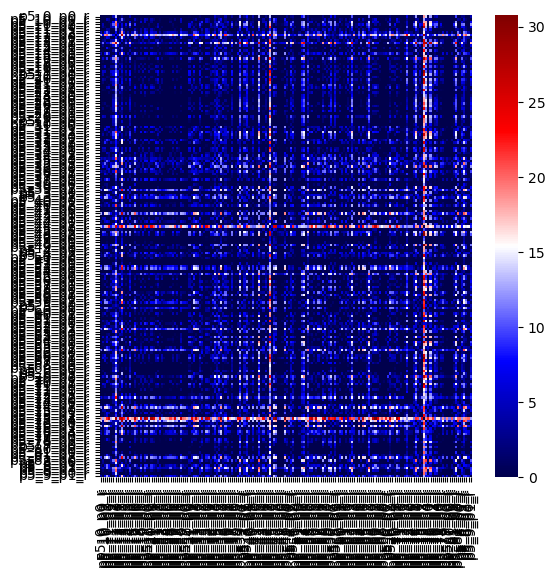

In [8]:
scores_file_min_dist_p5 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5/outputs_1.8/entry_pairs_min_dist.txt'
list_entries_p5 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5/outputs_1.8/pockets/off_files_p5_1.8/list_pocket_entries.txt'
sym_matrix_min_dist_p5, axes_labels_p5 = compute_scores_sym_matrix(scores_file_min_dist_p5, list_entries_p5)
score_max = sym_matrix_min_dist_p5.max() 
fig, (ax1) = plt.subplots(1, figsize=(6, 6))
sns.heatmap(sym_matrix_min_dist_p5,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels_p5,yticklabels=axes_labels_p5)



/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 3


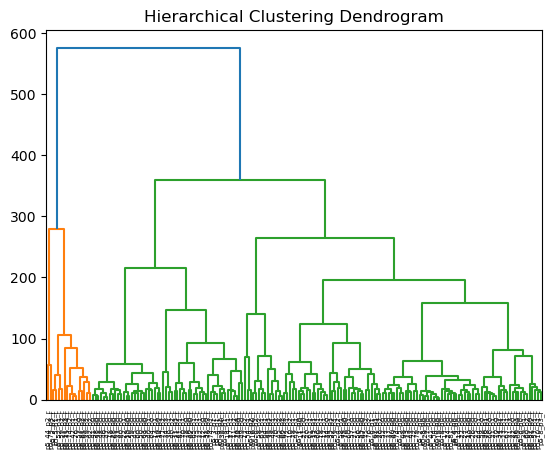

In [15]:
threshold = 300
clusters_all_pockets_p5=compute_clusters(sym_matrix_min_dist_p5, threshold,axes_labels_p5,cluster)


In [16]:
volumes_file_p5 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5/outputs_1.8/pockets_r_volumes.txt'


pockets_volumes_p5 = []
for i in range(len(clusters_all_pockets_p5)):
    #pocket_name = 'pocket_{}'.format(i)
    pocket_volumes_p5= compute_volumes_pockets(volumes_file_p5, clusters_all_pockets_p5[i])
    pockets_volumes_p5.append(pocket_volumes_p5)
    for pocket in pocket_volumes_p5:
        print(i,pocket[0],pocket[1])



0 p5_11_p3_r 220.66822406483334
0 p5_39_p2_r 240.228561077
0 p5_3_p2_r 220.80974511499977
0 p5_42_p1_r 354.02171320933337
0 p5_44_p2_r 223.78433234466684
0 p5_52_p1_r 532.381753807833
0 p5_53_p0_r 537.4898769458332
0 p5_59_p2_r 261.7174788371668
0 p5_5_p1_r 380.1683996549997
0 p5_62_p2_r 291.0753704061666
0 p5_65_p2_r 282.5367162354999
0 p5_74_p2_r 263.37156546083327
0 p5_75_p3_r 240.8726182561667
0 p5_75_p4_r 212.67457113216688
0 p5_76_p1_r 319.6265897441664
0 p5_81_p2_r 371.75114509149967
1 p5_10_p0_r 816.6527024948334
1 p5_11_p1_r 431.0555673629998
1 p5_11_p2_r 283.9388820493334
1 p5_12_p0_r 615.4431196451661
1 p5_13_p1_r 771.3416032324997
1 p5_14_p1_r 462.92587365449964
1 p5_18_p0_r 1003.5771764421663
1 p5_19_p0_r 1129.8325945613333
1 p5_20_p0_r 1111.3516669659998
1 p5_21_p2_r 274.2857380605002
1 p5_22_p1_r 766.9940079366668
1 p5_28_p0_r 1148.4299001495003
1 p5_31_p0_r 488.97128635350015
1 p5_32_p1_r 496.78046343400024
1 p5_33_p0_r 2094.715964599166
1 p5_34_p1_r 995.6182296826665
1

p5 with 200 snapshots rep 1

['p5_rep1_0_p0_r', 'p5_rep1_100_p0_r', 'p5_rep1_100_p1_r', 'p5_rep1_100_p2_r', 'p5_rep1_101_p0_r', 'p5_rep1_101_p1_r', 'p5_rep1_101_p2_r', 'p5_rep1_101_p3_r', 'p5_rep1_102_p0_r', 'p5_rep1_102_p1_r', 'p5_rep1_102_p2_r', 'p5_rep1_103_p0_r', 'p5_rep1_103_p1_r', 'p5_rep1_104_p0_r', 'p5_rep1_104_p1_r', 'p5_rep1_104_p2_r', 'p5_rep1_105_p0_r', 'p5_rep1_105_p1_r', 'p5_rep1_106_p0_r', 'p5_rep1_107_p0_r', 'p5_rep1_108_p0_r', 'p5_rep1_109_p0_r', 'p5_rep1_109_p1_r', 'p5_rep1_109_p2_r', 'p5_rep1_10_p0_r', 'p5_rep1_110_p0_r', 'p5_rep1_110_p1_r', 'p5_rep1_111_p0_r', 'p5_rep1_112_p0_r', 'p5_rep1_112_p1_r', 'p5_rep1_113_p0_r', 'p5_rep1_113_p1_r', 'p5_rep1_114_p0_r', 'p5_rep1_114_p1_r', 'p5_rep1_114_p2_r', 'p5_rep1_114_p3_r', 'p5_rep1_115_p0_r', 'p5_rep1_115_p1_r', 'p5_rep1_115_p2_r', 'p5_rep1_116_p0_r', 'p5_rep1_116_p1_r', 'p5_rep1_117_p0_r', 'p5_rep1_118_p0_r', 'p5_rep1_119_p0_r', 'p5_rep1_119_p1_r', 'p5_rep1_119_p2_r', 'p5_rep1_11_p0_r', 'p5_rep1_120_p0_r', 'p5_rep1_120_p1_r', 'p5_rep1_120_p2_r', 'p5

<AxesSubplot:>

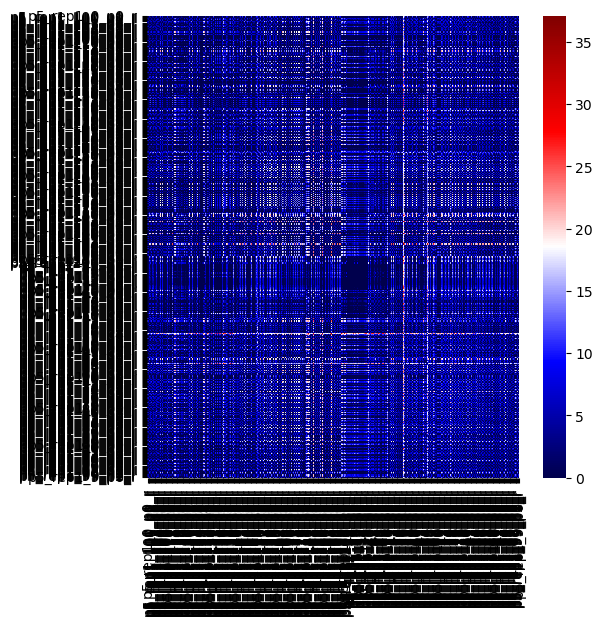

In [22]:
scores_file_min_dist_p5_200 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5_200snaps/rep1/outputs_1.8/entry_pairs_min_dist.txt'
list_entries_p5_200 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5_200snaps/rep1/outputs_1.8/list_pocket_entries_r.txt'
sym_matrix_min_dist_p5_200, axes_labels_p5_200 = compute_scores_sym_matrix(scores_file_min_dist_p5_200, list_entries_p5_200)
score_max_200 = sym_matrix_min_dist_p5_200.max() 
fig, (ax1) = plt.subplots(1, figsize=(6, 6))
sns.heatmap(sym_matrix_min_dist_p5_200,ax=ax1,vmin=0.0,vmax=score_max_200,cmap ='seismic',xticklabels=axes_labels_p5_200,yticklabels=axes_labels_p5_200)


/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 9


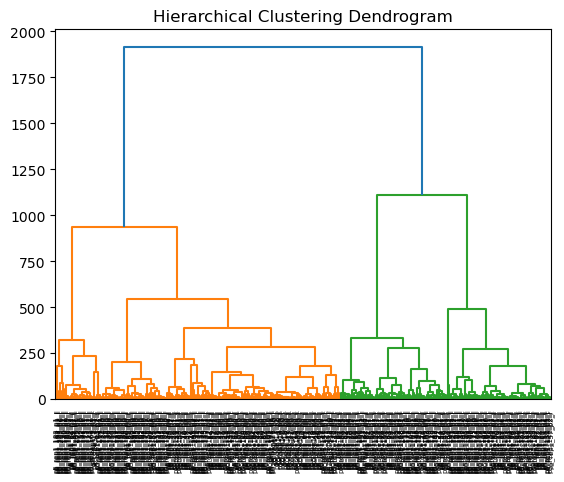

In [27]:
threshold = 300
clusters_all_pockets_p5_200=compute_clusters(sym_matrix_min_dist_p5_200, threshold,axes_labels_p5_200,cluster)


In [ ]:
volumes_file_p5_200 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5_200snaps/rep1/outputs_1.8/pocket_r_volumes.txt'


pockets_volumes_p5_200 = []
for i in range(len(clusters_all_pockets_p5_200)):
    #pocket_name = 'pocket_{}'.format(i)
    pocket_volumes_p5_200= compute_volumes_pockets(volumes_file_p5_200, clusters_all_pockets_p5_200[i])
    pockets_volumes_p5_200.append(pocket_volumes_p5_200)
    for pocket in pocket_volumes_p5_200:
        print(i,pocket[0],pocket[1])


0 p5_rep1_127_p2_r 273.6353825204998
0 p5_rep1_136_p2_r 238.18598295199996
0 p5_rep1_180_p1_r 275.2456729986667
0 p5_rep1_183_p1_r 209.22918523783315
0 p5_rep1_189_p1_r 216.73091025366693
0 p5_rep1_193_p2_r 210.19969322133332
0 p5_rep1_199_p1_r 280.80982851416667
0 p5_rep1_200_p0_r 467.25670139516706
1 p5_rep1_113_p1_r 291.5227946850003
1 p5_rep1_114_p1_r 242.79581998116646
1 p5_rep1_123_p2_r 421.9047899356665
1 p5_rep1_127_p3_r 262.4576810753334
1 p5_rep1_152_p0_r 459.6738821096661
1 p5_rep1_156_p0_r 593.8999262471667
1 p5_rep1_157_p0_r 540.7182333651667
1 p5_rep1_160_p1_r 597.0158512649992
1 p5_rep1_164_p1_r 252.12531085583342
1 p5_rep1_165_p0_r 698.9386117311667
1 p5_rep1_166_p0_r 529.4697084925001
1 p5_rep1_167_p0_r 472.3521407503334
1 p5_rep1_170_p1_r 372.82595503566665
1 p5_rep1_171_p1_r 454.8055336370004
1 p5_rep1_172_p1_r 425.9272723659998
1 p5_rep1_173_p1_r 359.2963626501665
1 p5_rep1_174_p1_r 292.3002683806667
1 p5_rep1_175_p1_r 566.156426850167
1 p5_rep1_17_p1_r 216.41468564

p5 200 snapshots rep 2

['p5_rep2_0_p0_r', 'p5_rep2_100_p0_r', 'p5_rep2_100_p1_r', 'p5_rep2_101_p0_r', 'p5_rep2_101_p1_r', 'p5_rep2_102_p0_r', 'p5_rep2_102_p1_r', 'p5_rep2_102_p2_r', 'p5_rep2_103_p0_r', 'p5_rep2_103_p1_r', 'p5_rep2_103_p2_r', 'p5_rep2_104_p0_r', 'p5_rep2_104_p1_r', 'p5_rep2_104_p2_r', 'p5_rep2_104_p3_r', 'p5_rep2_105_p0_r', 'p5_rep2_105_p1_r', 'p5_rep2_105_p2_r', 'p5_rep2_106_p0_r', 'p5_rep2_106_p1_r', 'p5_rep2_107_p0_r', 'p5_rep2_108_p0_r', 'p5_rep2_108_p1_r', 'p5_rep2_109_p0_r', 'p5_rep2_109_p1_r', 'p5_rep2_10_p0_r', 'p5_rep2_10_p1_r', 'p5_rep2_110_p0_r', 'p5_rep2_110_p1_r', 'p5_rep2_111_p0_r', 'p5_rep2_111_p1_r', 'p5_rep2_112_p0_r', 'p5_rep2_112_p1_r', 'p5_rep2_113_p0_r', 'p5_rep2_113_p1_r', 'p5_rep2_114_p0_r', 'p5_rep2_114_p1_r', 'p5_rep2_115_p0_r', 'p5_rep2_115_p1_r', 'p5_rep2_116_p0_r', 'p5_rep2_116_p1_r', 'p5_rep2_117_p0_r', 'p5_rep2_117_p1_r', 'p5_rep2_118_p0_r', 'p5_rep2_118_p1_r', 'p5_rep2_119_p0_r', 'p5_rep2_119_p1_r', 'p5_rep2_11_p0_r', 'p5_rep2_120_p0_r', 'p5_rep2_121_p0_r', 'p5_

<AxesSubplot:>

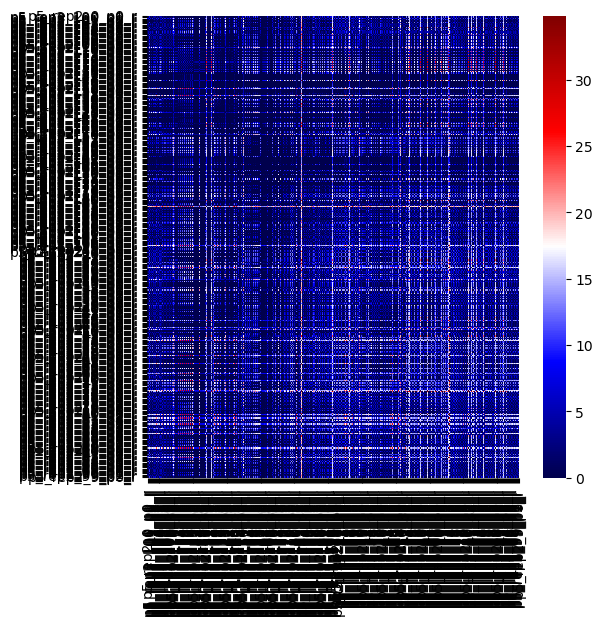

In [7]:
scores_file_min_dist_p5_200_rep2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5_200snaps/rep2/outputs_1.8/entries_r_min_dist.txt'
list_entries_p5_200_rep2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5_200snaps/rep2/outputs_1.8/list_pocket_entries_r.txt'
sym_matrix_min_dist_p5_200_rep2, axes_labels_p5_200_rep2 = compute_scores_sym_matrix(scores_file_min_dist_p5_200_rep2, list_entries_p5_200_rep2)
score_max_200_rep2 = sym_matrix_min_dist_p5_200_rep2.max() 
fig, (ax1) = plt.subplots(1, figsize=(6, 6))
sns.heatmap(sym_matrix_min_dist_p5_200_rep2,ax=ax1,vmin=0.0,vmax=score_max_200_rep2,cmap ='seismic',xticklabels=axes_labels_p5_200_rep2,yticklabels=axes_labels_p5_200_rep2)


/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 7


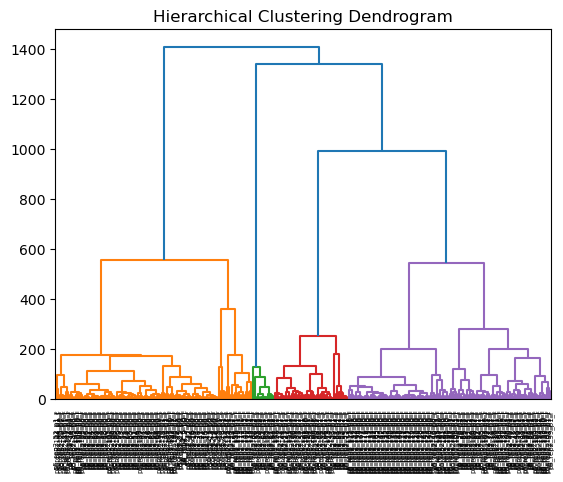

In [10]:
threshold = 300
clusters_all_pockets_p5_200_rep2=compute_clusters(sym_matrix_min_dist_p5_200_rep2, threshold,axes_labels_p5_200_rep2,cluster)


In [11]:
volumes_file_p5_200_rep2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5_200snaps/rep2/outputs_1.8/all_pockets_volumes.txt'


pockets_volumes_p5_200_rep2 = []
for i in range(len(clusters_all_pockets_p5_200_rep2)):
    #pocket_name = 'pocket_{}'.format(i)
    pocket_volumes_p5_200_rep2= compute_volumes_pockets(volumes_file_p5_200_rep2, clusters_all_pockets_p5_200_rep2[i])
    pockets_volumes_p5_200_rep2.append(pocket_volumes_p5_200_rep2)
    for pocket in pocket_volumes_p5_200_rep2:
        print(i,pocket[0],pocket[1])


0 p5_rep2_0_p0_r 655.1528653806669
0 p5_rep2_100_p0_r 1386.7982797179998
0 p5_rep2_101_p0_r 1421.8463923886666
0 p5_rep2_102_p0_r 1184.8713393764997
0 p5_rep2_103_p1_r 813.9369817408335
0 p5_rep2_104_p0_r 1628.6995737331672
0 p5_rep2_105_p0_r 858.1597104076669
0 p5_rep2_105_p2_r 349.5410393348332
0 p5_rep2_106_p0_r 1460.2635523379995
0 p5_rep2_107_p0_r 1877.5488662681666
0 p5_rep2_108_p0_r 1876.219610823333
0 p5_rep2_109_p0_r 1647.4280634885
0 p5_rep2_10_p0_r 733.2533564906671
0 p5_rep2_110_p0_r 1481.5922515774996
0 p5_rep2_11_p0_r 761.3085493804998
0 p5_rep2_12_p0_r 791.8841548691668
0 p5_rep2_134_p3_r 210.9959404383333
0 p5_rep2_13_p0_r 962.6525521365002
0 p5_rep2_142_p1_r 384.7698845891667
0 p5_rep2_145_p1_r 263.32568114866683
0 p5_rep2_14_p0_r 621.0837279776671
0 p5_rep2_15_p0_r 666.3743634033332
0 p5_rep2_16_p0_r 825.3929500076666
0 p5_rep2_173_p1_r 203.62774125900006
0 p5_rep2_17_p0_r 869.0612785705
0 p5_rep2_180_p0_r 664.9906225481664
0 p5_rep2_182_p1_r 376.49765919333333
0 p5_r

p5 200 snapshots rep 3

['p5_rep3_0_p0_r', 'p5_rep3_100_p0_r', 'p5_rep3_100_p1_r', 'p5_rep3_101_p0_r', 'p5_rep3_102_p0_r', 'p5_rep3_102_p1_r', 'p5_rep3_102_p2_r', 'p5_rep3_103_p0_r', 'p5_rep3_104_p0_r', 'p5_rep3_105_p0_r', 'p5_rep3_105_p1_r', 'p5_rep3_106_p0_r', 'p5_rep3_106_p1_r', 'p5_rep3_107_p0_r', 'p5_rep3_108_p0_r', 'p5_rep3_109_p0_r', 'p5_rep3_10_p0_r', 'p5_rep3_10_p1_r', 'p5_rep3_10_p2_r', 'p5_rep3_10_p3_r', 'p5_rep3_110_p0_r', 'p5_rep3_111_p0_r', 'p5_rep3_112_p0_r', 'p5_rep3_113_p0_r', 'p5_rep3_114_p0_r', 'p5_rep3_115_p0_r', 'p5_rep3_116_p0_r', 'p5_rep3_117_p0_r', 'p5_rep3_118_p0_r', 'p5_rep3_118_p1_r', 'p5_rep3_119_p0_r', 'p5_rep3_11_p0_r', 'p5_rep3_11_p1_r', 'p5_rep3_11_p2_r', 'p5_rep3_120_p0_r', 'p5_rep3_121_p0_r', 'p5_rep3_122_p0_r', 'p5_rep3_123_p0_r', 'p5_rep3_124_p0_r', 'p5_rep3_125_p0_r', 'p5_rep3_126_p0_r', 'p5_rep3_127_p0_r', 'p5_rep3_128_p0_r', 'p5_rep3_129_p0_r', 'p5_rep3_12_p0_r', 'p5_rep3_12_p1_r', 'p5_rep3_12_p2_r', 'p5_rep3_12_p3_r', 'p5_rep3_130_p0_r', 'p5_rep3_131_p0_r', 'p5_rep3_132

<AxesSubplot:>

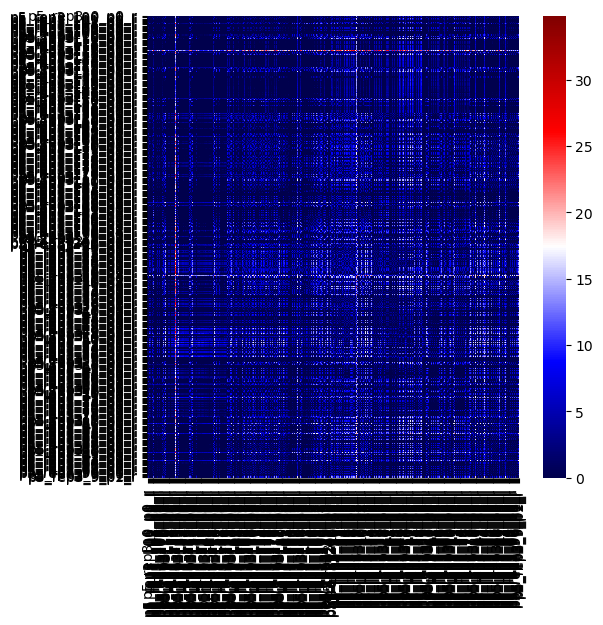

In [12]:
scores_file_min_dist_p5_200_rep3 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5_200snaps/rep3/outputs_1.8/entry_pairs_min_dist.txt'
list_entries_p5_200_rep3 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5_200snaps/rep3/outputs_1.8/list_pocket_entries_r.txt'
sym_matrix_min_dist_p5_200_rep3, axes_labels_p5_200_rep3 = compute_scores_sym_matrix(scores_file_min_dist_p5_200_rep3, list_entries_p5_200_rep3)
score_max_200_rep3 = sym_matrix_min_dist_p5_200_rep3.max() 
fig, (ax1) = plt.subplots(1, figsize=(6, 6))
sns.heatmap(sym_matrix_min_dist_p5_200_rep3,ax=ax1,vmin=0.0,vmax=score_max_200_rep3,cmap ='seismic',xticklabels=axes_labels_p5_200_rep3,yticklabels=axes_labels_p5_200_rep3)


/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 9


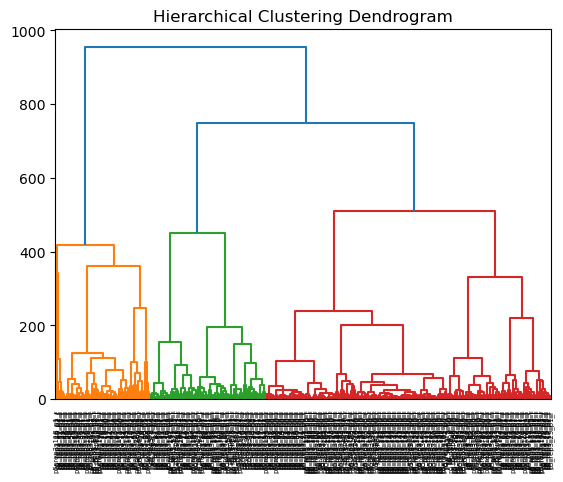

In [13]:
threshold = 300
clusters_all_pockets_p5_200_rep3=compute_clusters(sym_matrix_min_dist_p5_200_rep3, threshold,axes_labels_p5_200_rep3,cluster)


In [14]:
volumes_file_p5_200_rep3 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5_200snaps/rep3/outputs_1.8/all_pockets_r_volumes.txt'


pockets_volumes_p5_200_rep3 = []
for i in range(len(clusters_all_pockets_p5_200_rep3)):
    #pocket_name = 'pocket_{}'.format(i)
    pocket_volumes_p5_200_rep3= compute_volumes_pockets(volumes_file_p5_200_rep3, clusters_all_pockets_p5_200_rep3[i])
    pockets_volumes_p5_200_rep3.append(pocket_volumes_p5_200_rep3)
    for pocket in pocket_volumes_p5_200_rep3:
        print(i,pocket[0],pocket[1])


0 p5_rep3_29_p3_r 248.9612493570001
0 p5_rep3_48_p1_r 341.8875416663333
0 p5_rep3_49_p2_r 275.98432032466644
0 p5_rep3_50_p2_r 295.49176319316695
0 p5_rep3_51_p1_r 206.47386222883338
0 p5_rep3_52_p1_r 271.70051401516656
0 p5_rep3_56_p2_r 216.3118108875001
0 p5_rep3_71_p2_r 227.40305882283306
1 p5_rep3_118_p1_r 256.7718423656666
2 p5_rep3_102_p2_r 221.24308822216665
2 p5_rep3_10_p0_r 684.2561040008334
2 p5_rep3_11_p0_r 549.8685256939999
2 p5_rep3_12_p0_r 514.2944992258334
2 p5_rep3_14_p0_r 637.1852121719996
2 p5_rep3_158_p1_r 254.0248508446669
2 p5_rep3_159_p1_r 231.4504322503334
2 p5_rep3_15_p1_r 613.7829847536668
2 p5_rep3_160_p1_r 283.259873076666
2 p5_rep3_167_p3_r 286.8283725783332
2 p5_rep3_169_p2_r 310.8535118166668
2 p5_rep3_16_p1_r 583.7636879434996
2 p5_rep3_171_p0_r 543.5100224576669
2 p5_rep3_175_p1_r 343.6924940778333
2 p5_rep3_175_p2_r 203.31968513549978
2 p5_rep3_176_p1_r 561.5488345639999
2 p5_rep3_178_p3_r 229.12300540366655
2 p5_rep3_17_p0_r 648.6889009206667
2 p5_rep3

In [ ]:
volumes_file_p5 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p5/outputs/pockets_fixed_volumes.txt'
threshold = 200
clusters_pockets_vol_to2000_p5=compute_clusters(sym_matrix_vol_to2000_min_dist_p5, threshold,axes_labels_vol_to2000_p5,cluster)

pockets_volumes_to_2000_p5 = []
for i in range(len(clusters_pockets_vol_to2000_p5)):
    #pocket_name = 'pocket_{}'.format(i)
    pocket_volumes_to_2000_p5= compute_volumes_pockets(volumes_file_p5, clusters_pockets_vol_to2000_p5[i])
    pockets_volumes_to_2000_p5.append(pocket_volumes_to_2000_p5)
    for pocket in pocket_volumes_to_2000_p5:
        print(i,pocket[0],pocket[1])



abl1 200 snapshots rep1 

['r1_abl_rep1_0_p0_r', 'r1_abl_rep1_0_p1_r', 'r1_abl_rep1_100_p0_r', 'r1_abl_rep1_101_p0_r', 'r1_abl_rep1_101_p1_r', 'r1_abl_rep1_102_p0_r', 'r1_abl_rep1_103_p0_r', 'r1_abl_rep1_104_p0_r', 'r1_abl_rep1_105_p0_r', 'r1_abl_rep1_105_p1_r', 'r1_abl_rep1_106_p0_r', 'r1_abl_rep1_106_p1_r', 'r1_abl_rep1_106_p2_r', 'r1_abl_rep1_107_p0_r', 'r1_abl_rep1_107_p1_r', 'r1_abl_rep1_108_p0_r', 'r1_abl_rep1_108_p1_r', 'r1_abl_rep1_109_p0_r', 'r1_abl_rep1_109_p1_r', 'r1_abl_rep1_10_p0_r', 'r1_abl_rep1_110_p0_r', 'r1_abl_rep1_110_p1_r', 'r1_abl_rep1_111_p0_r', 'r1_abl_rep1_112_p0_r', 'r1_abl_rep1_113_p0_r', 'r1_abl_rep1_113_p1_r', 'r1_abl_rep1_114_p0_r', 'r1_abl_rep1_115_p0_r', 'r1_abl_rep1_116_p0_r', 'r1_abl_rep1_116_p1_r', 'r1_abl_rep1_117_p0_r', 'r1_abl_rep1_118_p0_r', 'r1_abl_rep1_119_p0_r', 'r1_abl_rep1_120_p0_r', 'r1_abl_rep1_121_p0_r', 'r1_abl_rep1_121_p1_r', 'r1_abl_rep1_122_p0_r', 'r1_abl_rep1_122_p1_r', 'r1_abl_rep1_123_p0_r', 'r1_abl_rep1_123_p1_r', 'r1_abl_rep1_124_p0_r', 'r1_abl_rep1_124_p1_

<AxesSubplot:>

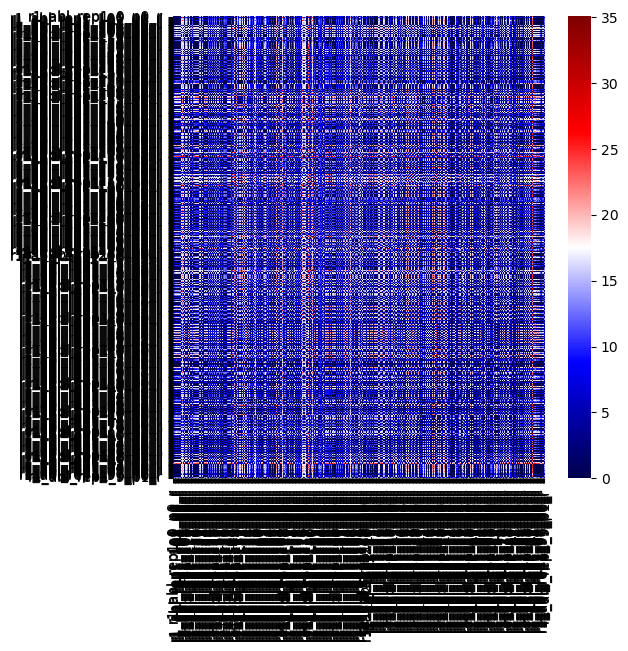

In [8]:
scores_min_dist_abl_rep1 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/abl/pairs_min_dist_rep1.txt'
list_entries_abl_rep1 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/abl/list_pocket_entries_rep1.txt'
sym_matrix_min_dist_abl_rep1, axes_labels_abl_rep1 = compute_scores_sym_matrix(scores_min_dist_abl_rep1, list_entries_abl_rep1)
score_max_abl_rep1 = sym_matrix_min_dist_abl_rep1.max() 
fig, (ax1) = plt.subplots(1, figsize=(6, 6))
sns.heatmap(sym_matrix_min_dist_abl_rep1,ax=ax1,vmin=0.0,vmax=score_max_abl_rep1,cmap ='seismic',xticklabels=axes_labels_abl_rep1,yticklabels=axes_labels_abl_rep1)


abl 200 snapshots replica 2

['r1_abl_rep2_0_p0_r', 'r1_abl_rep2_0_p1_r', 'r1_abl_rep2_100_p0_r', 'r1_abl_rep2_101_p0_r', 'r1_abl_rep2_101_p1_r', 'r1_abl_rep2_102_p0_r', 'r1_abl_rep2_102_p1_r', 'r1_abl_rep2_103_p0_r', 'r1_abl_rep2_103_p1_r', 'r1_abl_rep2_104_p0_r', 'r1_abl_rep2_104_p1_r', 'r1_abl_rep2_105_p0_r', 'r1_abl_rep2_105_p1_r', 'r1_abl_rep2_106_p0_r', 'r1_abl_rep2_106_p1_r', 'r1_abl_rep2_107_p0_r', 'r1_abl_rep2_108_p0_r', 'r1_abl_rep2_109_p0_r', 'r1_abl_rep2_109_p1_r', 'r1_abl_rep2_10_p0_r', 'r1_abl_rep2_110_p0_r', 'r1_abl_rep2_110_p1_r', 'r1_abl_rep2_110_p2_r', 'r1_abl_rep2_111_p0_r', 'r1_abl_rep2_112_p0_r', 'r1_abl_rep2_113_p0_r', 'r1_abl_rep2_113_p1_r', 'r1_abl_rep2_114_p0_r', 'r1_abl_rep2_114_p1_r', 'r1_abl_rep2_114_p2_r', 'r1_abl_rep2_115_p0_r', 'r1_abl_rep2_115_p1_r', 'r1_abl_rep2_115_p2_r', 'r1_abl_rep2_115_p3_r', 'r1_abl_rep2_116_p0_r', 'r1_abl_rep2_116_p1_r', 'r1_abl_rep2_117_p0_r', 'r1_abl_rep2_117_p1_r', 'r1_abl_rep2_118_p0_r', 'r1_abl_rep2_119_p0_r', 'r1_abl_rep2_11_p0_r', 'r1_abl_rep2_11_p1_r'

<AxesSubplot:>

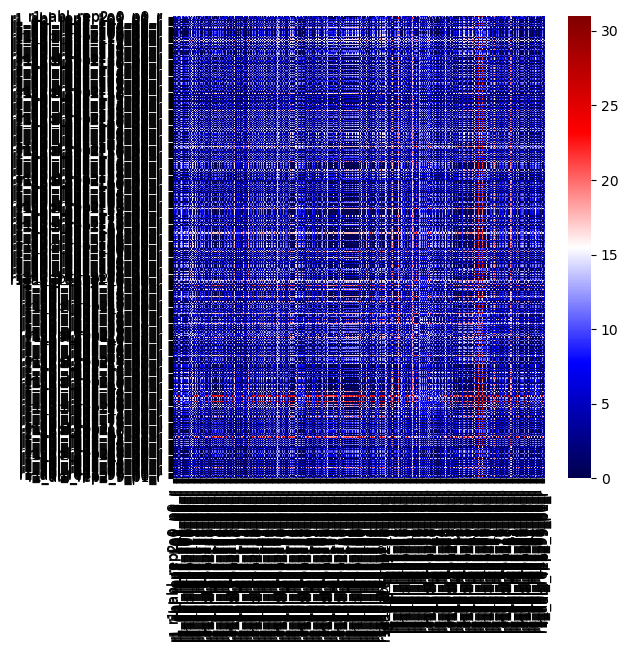

In [11]:
scores_min_dist_abl_rep2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/abl/pairs_min_dist_rep2.txt'
list_entries_abl_rep2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/abl/list_pocket_entries_rep2.txt'
sym_matrix_min_dist_abl_rep2, axes_labels_abl_rep2 = compute_scores_sym_matrix(scores_min_dist_abl_rep2, list_entries_abl_rep2)
score_max_abl_rep2 = sym_matrix_min_dist_abl_rep2.max() 
fig, (ax1) = plt.subplots(1, figsize=(6, 6))
sns.heatmap(sym_matrix_min_dist_abl_rep2,ax=ax1,vmin=0.0,vmax=score_max_abl_rep2,cmap ='seismic',xticklabels=axes_labels_abl_rep2,yticklabels=axes_labels_abl_rep2)


abl 200 snapshots replica 3

['r1_abl_rep3_0_p0_r', 'r1_abl_rep3_0_p1_r', 'r1_abl_rep3_100_p0_r', 'r1_abl_rep3_100_p1_r', 'r1_abl_rep3_101_p0_r', 'r1_abl_rep3_102_p0_r', 'r1_abl_rep3_102_p1_r', 'r1_abl_rep3_103_p0_r', 'r1_abl_rep3_104_p0_r', 'r1_abl_rep3_104_p1_r', 'r1_abl_rep3_104_p2_r', 'r1_abl_rep3_105_p0_r', 'r1_abl_rep3_105_p1_r', 'r1_abl_rep3_105_p2_r', 'r1_abl_rep3_106_p0_r', 'r1_abl_rep3_107_p0_r', 'r1_abl_rep3_107_p1_r', 'r1_abl_rep3_107_p2_r', 'r1_abl_rep3_108_p0_r', 'r1_abl_rep3_108_p1_r', 'r1_abl_rep3_108_p2_r', 'r1_abl_rep3_109_p0_r', 'r1_abl_rep3_109_p1_r', 'r1_abl_rep3_10_p0_r', 'r1_abl_rep3_10_p1_r', 'r1_abl_rep3_10_p2_r', 'r1_abl_rep3_110_p0_r', 'r1_abl_rep3_110_p1_r', 'r1_abl_rep3_111_p0_r', 'r1_abl_rep3_111_p1_r', 'r1_abl_rep3_112_p0_r', 'r1_abl_rep3_113_p0_r', 'r1_abl_rep3_114_p0_r', 'r1_abl_rep3_114_p1_r', 'r1_abl_rep3_115_p0_r', 'r1_abl_rep3_116_p0_r', 'r1_abl_rep3_116_p1_r', 'r1_abl_rep3_117_p0_r', 'r1_abl_rep3_118_p0_r', 'r1_abl_rep3_119_p0_r', 'r1_abl_rep3_119_p1_r', 'r1_abl_rep3_11_p0_r',

<AxesSubplot:>

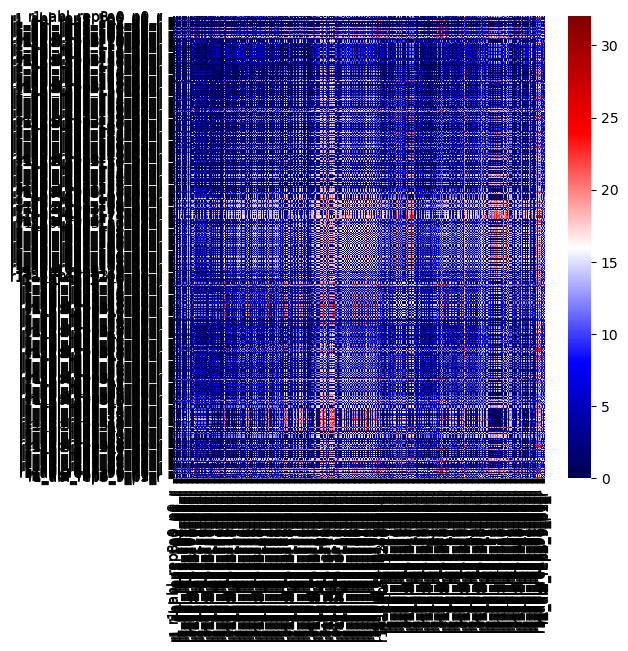

In [13]:
scores_min_dist_abl_rep3 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/abl/pairs_min_dist_rep3.txt'
list_entries_abl_rep3 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/abl/list_pocket_entries_rep3.txt'
sym_matrix_min_dist_abl_rep3, axes_labels_abl_rep3 = compute_scores_sym_matrix(scores_min_dist_abl_rep3, list_entries_abl_rep3)
score_max_abl_rep3 = sym_matrix_min_dist_abl_rep3.max() 
fig, (ax1) = plt.subplots(1, figsize=(6, 6))
sns.heatmap(sym_matrix_min_dist_abl_rep3,ax=ax1,vmin=0.0,vmax=score_max_abl_rep3,cmap ='seismic',xticklabels=axes_labels_abl_rep3,yticklabels=axes_labels_abl_rep3)


/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 10


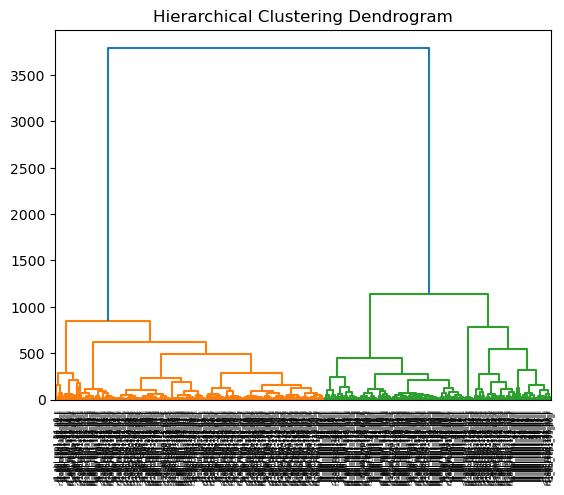

/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 8


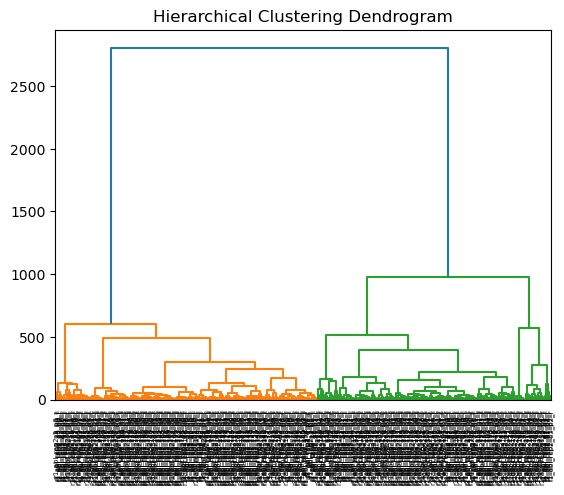

/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 13


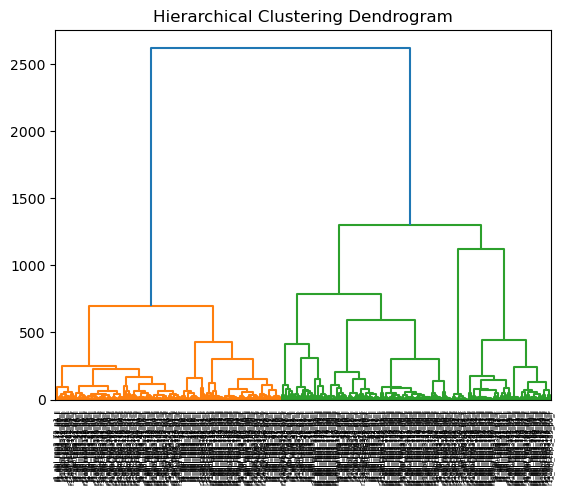

In [14]:
threshold = 300
clusters_all_pockets_abl_rep1=compute_clusters(sym_matrix_min_dist_abl_rep1, threshold,axes_labels_abl_rep1,cluster)
clusters_all_pockets_abl_rep2=compute_clusters(sym_matrix_min_dist_abl_rep2, threshold,axes_labels_abl_rep2,cluster)
clusters_all_pockets_abl_rep3=compute_clusters(sym_matrix_min_dist_abl_rep3, threshold,axes_labels_abl_rep3,cluster)

In [10]:
volumes_file_abl_rep1 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/abl/rep_1/pockets_r_volumes.txt'

pockets_volumes_abl_rep1 = []
for i in range(len(clusters_all_pockets_abl_rep1)):
    pocket_volumes_abl_rep1= compute_volumes_pockets(volumes_file_abl_rep1, clusters_all_pockets_abl_rep1[i])
    pockets_volumes_abl_rep1.append(pocket_volumes_abl_rep1)
    for pocket in pocket_volumes_abl_rep1:
        print(i,pocket[0],pocket[1])


0 r1_abl_rep1_0_p1_r 279.42091662016685
0 r1_abl_rep1_151_p2_r 251.37887937899995
0 r1_abl_rep1_155_p1_r 293.2768852543334
0 r1_abl_rep1_156_p0_r 248.20093383566655
0 r1_abl_rep1_157_p1_r 203.31835723283325
0 r1_abl_rep1_160_p2_r 210.97222261449997
0 r1_abl_rep1_184_p0_r 129278.21187124985
0 r1_abl_rep1_184_p4_r 288.84964093066685
0 r1_abl_rep1_21_p3_r 235.31375854383327
0 r1_abl_rep1_22_p2_r 282.93861100200013
0 r1_abl_rep1_33_p2_r 331.7156519585001
0 r1_abl_rep1_34_p2_r 308.576596162
0 r1_abl_rep1_46_p2_r 258.99138121283306
0 r1_abl_rep1_47_p3_r 251.7907129226669
0 r1_abl_rep1_50_p0_r 476.9982879936665
0 r1_abl_rep1_52_p2_r 252.77080985450021
0 r1_abl_rep1_54_p0_r 1180.0728289301655
0 r1_abl_rep1_54_p1_r 636.722169938667
0 r1_abl_rep1_56_p2_r 242.54087332716713
0 r1_abl_rep1_57_p3_r 238.02727585316643
0 r1_abl_rep1_58_p3_r 296.38465061133354
0 r1_abl_rep1_68_p1_r 1315.1898395209996
0 r1_abl_rep1_70_p0_r 634.9347989060003
0 r1_abl_rep1_82_p0_r 717.9179928694996
0 r1_abl_rep1_97_p2_r 2

In [15]:
volumes_file_abl_rep2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/abl/rep_2/pockets_r_volumes.txt'

pockets_volumes_abl_rep2 = []
for i in range(len(clusters_all_pockets_abl_rep2)):
    pocket_volumes_abl_rep2= compute_volumes_pockets(volumes_file_abl_rep2, clusters_all_pockets_abl_rep2[i])
    pockets_volumes_abl_rep2.append(pocket_volumes_abl_rep2)
    for pocket in pocket_volumes_abl_rep2:
        print(i,pocket[0],pocket[1])

0 r1_abl_rep2_0_p1_r 279.42091662016685
0 r1_abl_rep2_101_p0_r 709.6585836115001
0 r1_abl_rep2_105_p1_r 204.1009733831667
0 r1_abl_rep2_115_p0_r 659.9775027118333
0 r1_abl_rep2_120_p1_r 355.81556691749995
0 r1_abl_rep2_15_p2_r 482.3848932149997
0 r1_abl_rep2_19_p0_r 397.0305035888335
0 r1_abl_rep2_21_p0_r 737.010493428667
0 r1_abl_rep2_22_p0_r 574.1372985098337
0 r1_abl_rep2_24_p0_r 541.0206623268325
0 r1_abl_rep2_25_p0_r 533.4725631518332
0 r1_abl_rep2_27_p0_r 1528.4717467763335
0 r1_abl_rep2_32_p1_r 658.6923747971666
0 r1_abl_rep2_34_p2_r 304.5838739616668
0 r1_abl_rep2_35_p0_r 517.7123151426667
0 r1_abl_rep2_36_p0_r 445.50631451716663
0 r1_abl_rep2_38_p0_r 1126.8987487685004
0 r1_abl_rep2_43_p0_r 1093.680824401833
0 r1_abl_rep2_44_p0_r 1085.9469610091664
0 r1_abl_rep2_5_p0_r 645.7481884164999
0 r1_abl_rep2_85_p2_r 261.3219651836664
0 r1_abl_rep2_86_p1_r 206.82740624666667
0 r1_abl_rep2_91_p1_r 570.3827139214997
0 r1_abl_rep2_92_p0_r 460.3176524510002
0 r1_abl_rep2_93_p1_r 569.992130

In [16]:
volumes_file_abl_rep3 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/abl/rep_3/pockets_r_volumes.txt'

pockets_volumes_abl_rep3 = []
for i in range(len(clusters_all_pockets_abl_rep3)):
    pocket_volumes_abl_rep3= compute_volumes_pockets(volumes_file_abl_rep3, clusters_all_pockets_abl_rep3[i])
    pockets_volumes_abl_rep3.append(pocket_volumes_abl_rep3)
    for pocket in pocket_volumes_abl_rep3:
        print(i,pocket[0],pocket[1])

0 r1_abl_rep3_104_p1_r 951.8694053810001
0 r1_abl_rep3_105_p1_r 1030.4592318851662
0 r1_abl_rep3_107_p1_r 1573.4363938636673
0 r1_abl_rep3_109_p1_r 1461.7275473496668
0 r1_abl_rep3_10_p0_r 882.5604066913335
0 r1_abl_rep3_10_p1_r 755.6118575073328
0 r1_abl_rep3_111_p1_r 1061.6318746656666
0 r1_abl_rep3_114_p1_r 263.3856245341667
0 r1_abl_rep3_116_p1_r 271.05595141433366
0 r1_abl_rep3_119_p1_r 558.9960016456669
0 r1_abl_rep3_11_p0_r 640.9776993821666
0 r1_abl_rep3_11_p1_r 606.6175859111668
0 r1_abl_rep3_120_p1_r 490.48807306766685
0 r1_abl_rep3_121_p1_r 730.2878152928333
0 r1_abl_rep3_122_p1_r 814.2326383569996
0 r1_abl_rep3_123_p1_r 1030.925339454333
0 r1_abl_rep3_124_p1_r 726.1004847700002
0 r1_abl_rep3_126_p1_r 814.8463934573333
0 r1_abl_rep3_127_p1_r 977.7014626528332
0 r1_abl_rep3_128_p1_r 669.3647651101667
0 r1_abl_rep3_129_p1_r 325.15156216150035
0 r1_abl_rep3_12_p0_r 504.5419595136666
0 r1_abl_rep3_130_p1_r 590.3213763703332
0 r1_abl_rep3_131_p1_r 585.5828243635001
0 r1_abl_rep3_

P6 trajectory 

['p6_0_p0_r', 'p6_0_p1_r', 'p6_10_p0_r', 'p6_11_p0_r', 'p6_13_p0_r', 'p6_14_p0_r', 'p6_14_p1_r', 'p6_15_p0_r', 'p6_15_p1_r', 'p6_17_p0_r', 'p6_18_p0_r', 'p6_19_p0_r', 'p6_1_p0_r', 'p6_21_p0_r', 'p6_21_p1_r', 'p6_22_p0_r', 'p6_23_p0_r', 'p6_24_p0_r', 'p6_24_p1_r', 'p6_25_p0_r', 'p6_25_p1_r', 'p6_26_p0_r', 'p6_26_p1_r', 'p6_27_p0_r', 'p6_27_p1_r', 'p6_28_p0_r', 'p6_28_p1_r', 'p6_29_p0_r', 'p6_2_p0_r', 'p6_30_p0_r', 'p6_30_p1_r', 'p6_31_p0_r', 'p6_31_p1_r', 'p6_32_p0_r', 'p6_33_p0_r', 'p6_34_p0_r', 'p6_35_p0_r', 'p6_36_p0_r', 'p6_36_p1_r', 'p6_37_p0_r', 'p6_38_p0_r', 'p6_38_p1_r', 'p6_39_p0_r', 'p6_39_p1_r', 'p6_3_p0_r', 'p6_40_p0_r', 'p6_40_p1_r', 'p6_40_p2_r', 'p6_41_p0_r', 'p6_41_p1_r', 'p6_42_p0_r', 'p6_42_p1_r', 'p6_43_p0_r', 'p6_44_p0_r', 'p6_45_p0_r', 'p6_46_p0_r', 'p6_49_p0_r', 'p6_49_p1_r', 'p6_4_p0_r', 'p6_4_p1_r', 'p6_4_p2_r', 'p6_50_p0_r', 'p6_51_p0_r', 'p6_52_p0_r', 'p6_53_p0_r', 'p6_53_p1_r', 'p6_54_p0_r', 'p6_54_p1_r', 'p6_55_p0_r', 'p6_57_p0_r', 'p6_57_p1_r', 'p6_58_p0_r',

<AxesSubplot:>

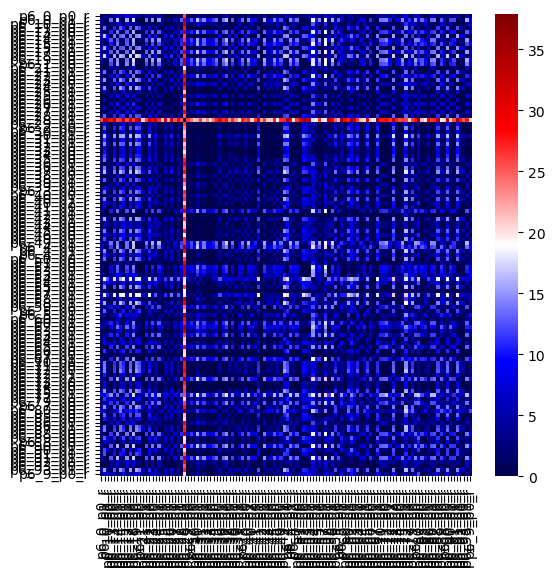

In [18]:
scores_file_min_dist_p6 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p6/outputs_1.8/entry_pairs_min_dist.txt'
list_entries_p6 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p6/outputs_1.8/list_entry_pockets.txt'
sym_matrix_min_dist_p6, axes_labels_p6 = compute_scores_sym_matrix(scores_file_min_dist_p6, list_entries_p6)
score_max = sym_matrix_min_dist_p6.max() 
fig, (ax1) = plt.subplots(1, figsize=(6, 6))
sns.heatmap(sym_matrix_min_dist_p6,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels_p6,yticklabels=axes_labels_p6)



/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 3


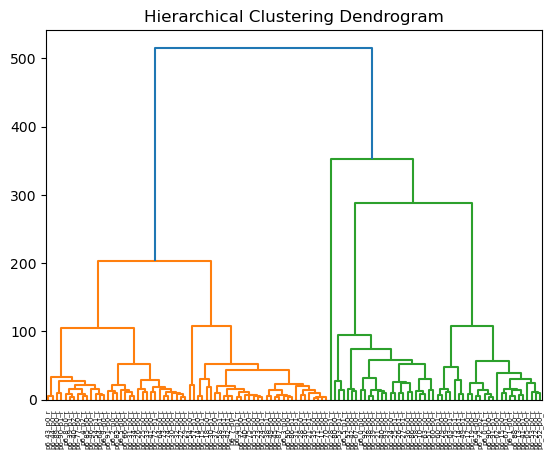

In [20]:
threshold = 300
clusters_all_pockets_p6=compute_clusters(sym_matrix_min_dist_p6, threshold,axes_labels_p6,cluster)


In [ ]:
scores = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/abl/rep1/rad_1.4/pairs_min_dist.txt'
list_entries= '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/abl/rep1/rad_1.4/list_pocket_entries.txt'
sym_matrix_min_dist, axes_labels = compute_scores_sym_matrix(scores, list_entries)
score_max = sym_matrix_min_dist.max() 
print(score_max)
fig, (ax1) = plt.subplots(1, figsize=(4, 4))
sns.heatmap(sym_matrix_min_dist,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)


/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 6


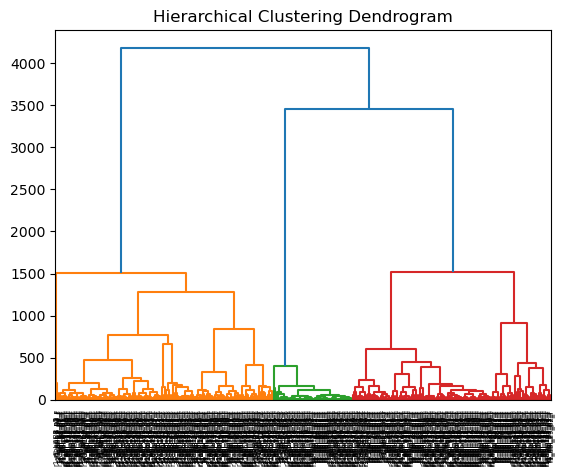

0 r1_abl_17_p4_r 236.21869262783335
0 r1_abl_185_p5_r 206.2241188953335
0 r1_abl_37_p3_r 250.6435955598334
0 r1_abl_4_p3_r 210.95759292533353
0 r1_abl_5_p2_r 204.62241737649995
0 r1_abl_8_p2_r 565.178617164667
1 r1_abl_0_p1_r 554.3235804736667
1 r1_abl_100_p0_r 1228.3830256158335
1 r1_abl_101_p0_r 1091.9627533903335
1 r1_abl_101_p1_r 284.1748879118334
1 r1_abl_102_p0_r 1226.5263441588334
1 r1_abl_103_p0_r 1127.2568004023333
1 r1_abl_104_p0_r 974.7211598846663
1 r1_abl_105_p0_r 1125.7373748481664
1 r1_abl_107_p0_r 1102.5970253836663
1 r1_abl_107_p3_r 202.92638970666673
1 r1_abl_108_p0_r 1027.8192385246666
1 r1_abl_109_p0_r 1326.9328811628343
1 r1_abl_10_p1_r 202.6679752263333
1 r1_abl_110_p0_r 1065.2993982593334
1 r1_abl_110_p3_r 201.38456201400004
1 r1_abl_111_p0_r 1272.8678591176663
1 r1_abl_112_p0_r 1404.8881477955001
1 r1_abl_113_p0_r 1227.0663927401665
1 r1_abl_114_p0_r 1317.1955047108331
1 r1_abl_115_p0_r 1168.3831397505
1 r1_abl_116_p0_r 1234.8260590058335
1 r1_abl_117_p0_r 1134.

In [78]:
threshold = 1000
clusters_all_pockets=compute_clusters(sym_matrix_min_dist, threshold,axes_labels,cluster)

volumes_file = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/abl/rep1/rad_1.4/pockets_r_volumes.txt'


pockets_volumes = []
for i in range(len(clusters_all_pockets)):
    pocket_volumes= compute_volumes_pockets(volumes_file, clusters_all_pockets[i])
    pockets_volumes.append(pocket_volumes)
    for pocket in pocket_volumes:
        print(i,pocket[0],pocket[1])

CBIB1 - 200 snapshots

['r1_cib1_100_p0_r', 'r1_cib1_101_p0_r', 'r1_cib1_102_p0_r', 'r1_cib1_104_p0_r', 'r1_cib1_105_p0_r', 'r1_cib1_106_p0_r', 'r1_cib1_108_p0_r', 'r1_cib1_109_p0_r', 'r1_cib1_10_p0_r', 'r1_cib1_10_p1_r', 'r1_cib1_111_p0_r', 'r1_cib1_112_p0_r', 'r1_cib1_115_p0_r', 'r1_cib1_116_p0_r', 'r1_cib1_116_p1_r', 'r1_cib1_117_p0_r', 'r1_cib1_118_p0_r', 'r1_cib1_119_p0_r', 'r1_cib1_11_p0_r', 'r1_cib1_120_p0_r', 'r1_cib1_121_p0_r', 'r1_cib1_125_p0_r', 'r1_cib1_126_p0_r', 'r1_cib1_127_p0_r', 'r1_cib1_129_p0_r', 'r1_cib1_130_p0_r', 'r1_cib1_131_p0_r', 'r1_cib1_132_p0_r', 'r1_cib1_133_p0_r', 'r1_cib1_135_p0_r', 'r1_cib1_135_p1_r', 'r1_cib1_136_p0_r', 'r1_cib1_139_p0_r', 'r1_cib1_13_p0_r', 'r1_cib1_140_p0_r', 'r1_cib1_141_p0_r', 'r1_cib1_142_p0_r', 'r1_cib1_143_p0_r', 'r1_cib1_144_p0_r', 'r1_cib1_145_p0_r', 'r1_cib1_146_p0_r', 'r1_cib1_147_p0_r', 'r1_cib1_148_p0_r', 'r1_cib1_14_p0_r', 'r1_cib1_151_p0_r', 'r1_cib1_152_p0_r', 'r1_cib1_153_p0_r', 'r1_cib1_154_p0_r', 'r1_cib1_155_p0_r', 'r1_cib1_156_p0_r', 'r1_

<AxesSubplot:>

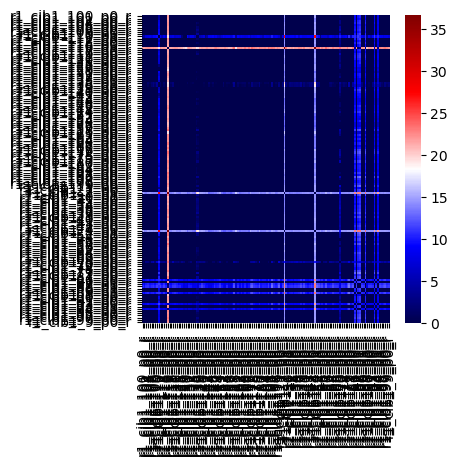

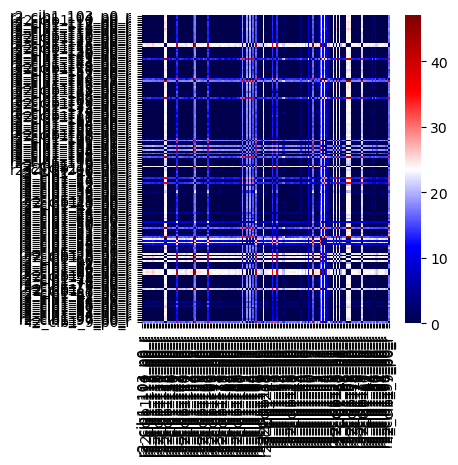

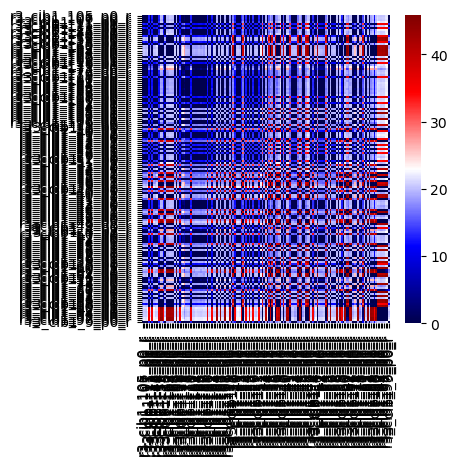

In [21]:
scores_min_dist_cib1_rep1 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/cib1/rep1/rad_1.8/pairs_min_dist.txt'
list_entries_cib1_rep1 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/cib1/rep1/rad_1.8/list_pocket_entries.txt'
sym_matrix_min_dist_cib1_rep1, axes_labels_cib1_rep1 = compute_scores_sym_matrix(scores_min_dist_cib1_rep1, list_entries_cib1_rep1)
score_max_cib1_rep1 = sym_matrix_min_dist_cib1_rep1.max() 
fig, (ax1) = plt.subplots(1, figsize=(4, 4))
sns.heatmap(sym_matrix_min_dist_cib1_rep1,ax=ax1,vmin=0.0,vmax=score_max_cib1_rep1,cmap ='seismic',xticklabels=axes_labels_cib1_rep1,yticklabels=axes_labels_cib1_rep1)

scores_min_dist_cib1_rep2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/cib1/rep2/rad_1.8/pairs_min_dist.txt'
list_entries_cib1_rep2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/cib1/rep2/rad_1.8/list_pocket_entries.txt'
sym_matrix_min_dist_cib1_rep2, axes_labels_cib1_rep2 = compute_scores_sym_matrix(scores_min_dist_cib1_rep2, list_entries_cib1_rep2)
score_max_cib1_rep2 = sym_matrix_min_dist_cib1_rep2.max() 
fig, (ax1) = plt.subplots(1, figsize=(4, 4))
sns.heatmap(sym_matrix_min_dist_cib1_rep2,ax=ax1,vmin=0.0,vmax=score_max_cib1_rep2,cmap ='seismic',xticklabels=axes_labels_cib1_rep2,yticklabels=axes_labels_cib1_rep2)

scores_min_dist_cib1_rep3 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/cib1/rep3/rad_1.8/pairs_min_dist.txt'
list_entries_cib1_rep3 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/cib1/rep3/rad_1.8/list_pocket_entries.txt'
sym_matrix_min_dist_cib1_rep3, axes_labels_cib1_rep3 = compute_scores_sym_matrix(scores_min_dist_cib1_rep3, list_entries_cib1_rep3)
score_max_cib1_rep3 = sym_matrix_min_dist_cib1_rep3.max() 
fig, (ax1) = plt.subplots(1, figsize=(4, 4))
sns.heatmap(sym_matrix_min_dist_cib1_rep3,ax=ax1,vmin=0.0,vmax=score_max_cib1_rep3,cmap ='seismic',xticklabels=axes_labels_cib1_rep3,yticklabels=axes_labels_cib1_rep3)


/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 2


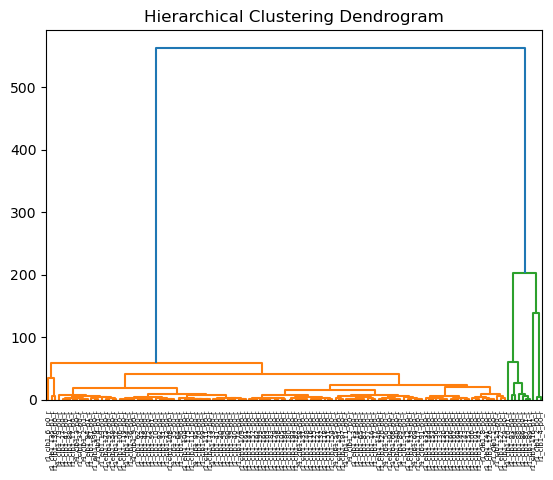

/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 4


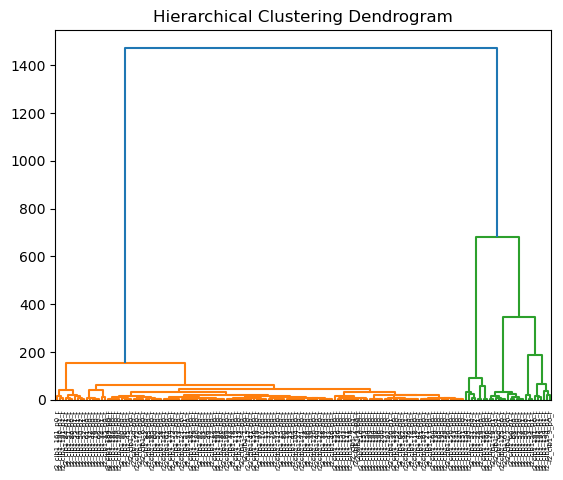

/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 4


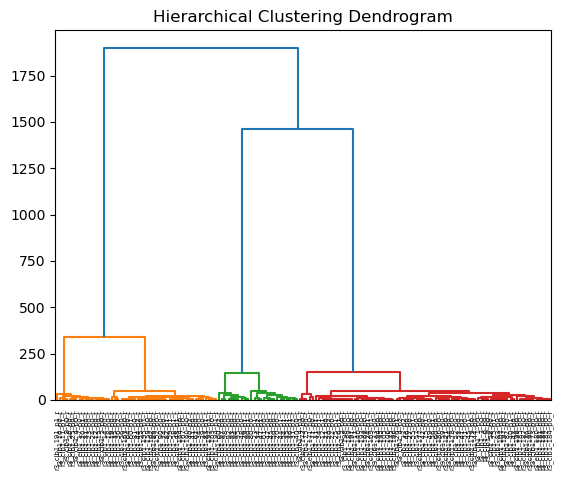

In [22]:
threshold = 300
clusters_all_pockets_cib1_rep1=compute_clusters(sym_matrix_min_dist_cib1_rep1, threshold,axes_labels_cib1_rep1,cluster)
clusters_all_pockets_cib1_rep2=compute_clusters(sym_matrix_min_dist_cib1_rep2, threshold,axes_labels_cib1_rep2,cluster)
clusters_all_pockets_cib1_rep3=compute_clusters(sym_matrix_min_dist_cib1_rep3, threshold,axes_labels_cib1_rep3,cluster)

In [53]:
volumes_file_cib1_rep1 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/cib1/rep1/rad_1.8/pockets_r_volumes.txt'

pockets_volumes_cib1_rep1 = []
output_file = os.path.join('/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/cib1/rep1/rad_1.8/','r1_clusters_ward_300.txt')
for i in range(len(clusters_all_pockets_cib1_rep1)):
    pocket_volumes_cib1_rep1 = compute_volumes_pockets(volumes_file_cib1_rep1, clusters_all_pockets_cib1_rep1[i])
    pockets_volumes_cib1_rep1.append(pocket_volumes_cib1_rep1)
    for pocket in pocket_volumes_cib1_rep1:
        print(i,pocket[0],pocket[1])

0 r1_cib1_100_p0_r 414.83557192299986
0 r1_cib1_101_p0_r 490.74585699283335
0 r1_cib1_102_p0_r 390.8286524738336
0 r1_cib1_104_p0_r 282.6688438803334
0 r1_cib1_105_p0_r 306.365201747
0 r1_cib1_106_p0_r 215.25663224616667
0 r1_cib1_108_p0_r 226.22774307016675
0 r1_cib1_109_p0_r 239.97444232850012
0 r1_cib1_10_p0_r 215.51191220466663
0 r1_cib1_111_p0_r 290.7332497646667
0 r1_cib1_112_p0_r 384.24145258833323
0 r1_cib1_115_p0_r 224.4634632780003
0 r1_cib1_116_p0_r 356.70796189716657
0 r1_cib1_117_p0_r 364.11285917633325
0 r1_cib1_118_p0_r 301.7719903871666
0 r1_cib1_119_p0_r 202.473059105
0 r1_cib1_11_p0_r 312.8191813710001
0 r1_cib1_120_p0_r 339.3372327498331
0 r1_cib1_121_p0_r 328.3207472335
0 r1_cib1_125_p0_r 336.0108807611665
0 r1_cib1_126_p0_r 442.01517676733357
0 r1_cib1_127_p0_r 653.3052694736667
0 r1_cib1_129_p0_r 594.2047936186665
0 r1_cib1_130_p0_r 360.3584254606668
0 r1_cib1_131_p0_r 288.7576082483332
0 r1_cib1_132_p0_r 269.6667575096666
0 r1_cib1_133_p0_r 367.05317939516647
0 r

In [54]:
volumes_file_cib1_rep2 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/cib1/rep2/rad_1.8/pockets_r_volumes.txt'

pockets_volumes_cib1_rep2 = []

for i in range(len(clusters_all_pockets_cib1_rep2)):
    pocket_volumes_cib1_rep2 = compute_volumes_pockets(volumes_file_cib1_rep2, clusters_all_pockets_cib1_rep2[i])
    pockets_volumes_cib1_rep2.append(pocket_volumes_cib1_rep2)
    for pocket in pocket_volumes_cib1_rep2:
        print(i,pocket[0],pocket[1])

0 r2_cib1_103_p0_r 201.61124605400005
0 r2_cib1_104_p0_r 317.61823410650004
0 r2_cib1_10_p0_r 396.19451252499977
0 r2_cib1_111_p0_r 202.06967068300014
0 r2_cib1_112_p0_r 272.95270311700006
0 r2_cib1_113_p0_r 245.15123938899993
0 r2_cib1_115_p0_r 326.33148737000045
0 r2_cib1_116_p0_r 218.35364603299996
0 r2_cib1_117_p0_r 272.4468379683333
0 r2_cib1_118_p0_r 224.2489689421668
0 r2_cib1_119_p0_r 299.3477376194999
0 r2_cib1_11_p0_r 206.2086345483332
0 r2_cib1_120_p0_r 424.99258049349993
0 r2_cib1_121_p0_r 355.7075329406666
0 r2_cib1_122_p0_r 448.99701353833336
0 r2_cib1_12_p0_r 321.32521502666674
0 r2_cib1_136_p0_r 225.4159620806663
0 r2_cib1_138_p0_r 440.34187692450007
0 r2_cib1_139_p0_r 274.7735257589997
0 r2_cib1_140_p0_r 313.5414170138333
0 r2_cib1_141_p0_r 260.07417231883346
0 r2_cib1_142_p1_r 205.95252227833308
0 r2_cib1_143_p0_r 211.1545562769998
0 r2_cib1_144_p0_r 239.71123920366648
0 r2_cib1_149_p0_r 288.35101087299984
0 r2_cib1_14_p0_r 272.32909142316686
0 r2_cib1_150_p0_r 410.68

In [55]:
volumes_file_cib1_rep3 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/cib1/rep3/rad_1.8/pockets_r_volumes.txt'

pockets_volumes_cib1_rep3 = []

for i in range(len(clusters_all_pockets_cib1_rep3)):
    pocket_volumes_cib1_rep3 = compute_volumes_pockets(volumes_file_cib1_rep3, clusters_all_pockets_cib1_rep3[i])
    pockets_volumes_cib1_rep3.append(pocket_volumes_cib1_rep3)
    for pocket in pocket_volumes_cib1_rep3:
        print(i,pocket[0],pocket[1])

0 r3_cib1_11_p1_r 268.13757772416676
0 r3_cib1_12_p0_r 315.14588635699994
0 r3_cib1_14_p0_r 356.40609989433324
0 r3_cib1_15_p0_r 278.8525381846664
0 r3_cib1_16_p0_r 333.12049527733325
0 r3_cib1_17_p0_r 299.65839446133316
0 r3_cib1_18_p0_r 281.11223249399984
0 r3_cib1_191_p1_r 224.35132901400004
0 r3_cib1_20_p1_r 273.5311571703334
0 r3_cib1_23_p0_r 445.5272871548333
0 r3_cib1_24_p0_r 403.0215917545
0 r3_cib1_25_p0_r 428.86685130633316
0 r3_cib1_26_p0_r 442.31704172266643
0 r3_cib1_31_p0_r 439.5471621678333
0 r3_cib1_4_p0_r 396.38046555949995
0 r3_cib1_5_p0_r 327.18689494533305
0 r3_cib1_8_p0_r 372.5036600209999
1 r3_cib1_152_p0_r 252.18017936616684
1 r3_cib1_159_p0_r 236.46589083883327
1 r3_cib1_160_p0_r 227.98696174183343
1 r3_cib1_162_p0_r 489.172903182
1 r3_cib1_163_p0_r 370.36372536516643
1 r3_cib1_164_p0_r 341.08734633766676
1 r3_cib1_167_p0_r 348.4830810201668
1 r3_cib1_169_p0_r 295.44280813066655
1 r3_cib1_194_p1_r 330.33441242966666
1 r3_cib1_195_p1_r 311.70798721999995
1 r3_cib

In [21]:
volumes_file_p6 = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/p6/outputs_1.8/pockets_r_volume.txt'


pockets_volumes_p6 = []
for i in range(len(clusters_all_pockets_p6)):
    #pocket_name = 'pocket_{}'.format(i)
    pocket_volumes_p6= compute_volumes_pockets(volumes_file_p6, clusters_all_pockets_p6[i])
    pockets_volumes_p6.append(pocket_volumes_p6)
    for pocket in pocket_volumes_p6:
        print(i,pocket[0],pocket[1])


0 p6_11_p0_r 342.1499051048332
0 p6_14_p0_r 285.50595038916674
0 p6_15_p1_r 208.37034346466658
0 p6_18_p0_r 232.87813437883315
0 p6_21_p1_r 451.96431221233286
0 p6_23_p0_r 334.8981011576669
0 p6_24_p1_r 274.67910666333347
0 p6_25_p0_r 1261.6910792793335
0 p6_26_p0_r 806.0987766694998
0 p6_27_p0_r 545.6572937896665
0 p6_28_p0_r 387.8498204816668
0 p6_29_p0_r 674.2694439208332
0 p6_2_p0_r 415.49235289049994
0 p6_30_p0_r 803.1394419843333
0 p6_30_p1_r 275.68117462466637
0 p6_31_p0_r 372.52238009300027
0 p6_31_p1_r 204.51956776850002
0 p6_32_p0_r 908.0715012300004
0 p6_33_p0_r 1117.690141689333
0 p6_34_p0_r 626.3427355173332
0 p6_35_p0_r 363.0804964248333
0 p6_36_p1_r 350.44287390266646
0 p6_37_p0_r 219.40335401316662
0 p6_38_p1_r 283.0452861741667
0 p6_39_p1_r 327.3246037523334
0 p6_3_p0_r 305.9298290105001
0 p6_40_p1_r 405.03041933433275
0 p6_40_p2_r 358.30865699749995
0 p6_41_p0_r 603.9836250828333
0 p6_42_p1_r 325.69505252533355
0 p6_43_p0_r 479.0992488181664
0 p6_44_p0_r 359.583084654

DHFR - 200 snapshots

['r3_dhfr_0_p0_r', 'r3_dhfr_109_p0_r', 'r3_dhfr_10_p0_r', 'r3_dhfr_110_p0_r', 'r3_dhfr_111_p0_r', 'r3_dhfr_111_p1_r', 'r3_dhfr_113_p0_r', 'r3_dhfr_114_p0_r', 'r3_dhfr_115_p0_r', 'r3_dhfr_117_p0_r', 'r3_dhfr_117_p1_r', 'r3_dhfr_118_p0_r', 'r3_dhfr_118_p1_r', 'r3_dhfr_119_p0_r', 'r3_dhfr_120_p0_r', 'r3_dhfr_121_p0_r', 'r3_dhfr_122_p0_r', 'r3_dhfr_124_p0_r', 'r3_dhfr_124_p1_r', 'r3_dhfr_126_p0_r', 'r3_dhfr_126_p1_r', 'r3_dhfr_127_p0_r', 'r3_dhfr_129_p0_r', 'r3_dhfr_129_p1_r', 'r3_dhfr_12_p0_r', 'r3_dhfr_130_p0_r', 'r3_dhfr_131_p0_r', 'r3_dhfr_134_p0_r', 'r3_dhfr_135_p0_r', 'r3_dhfr_136_p0_r', 'r3_dhfr_137_p0_r', 'r3_dhfr_139_p0_r', 'r3_dhfr_140_p0_r', 'r3_dhfr_141_p0_r', 'r3_dhfr_154_p0_r', 'r3_dhfr_157_p0_r', 'r3_dhfr_158_p0_r', 'r3_dhfr_165_p0_r', 'r3_dhfr_170_p0_r', 'r3_dhfr_171_p0_r', 'r3_dhfr_173_p0_r', 'r3_dhfr_174_p0_r', 'r3_dhfr_175_p0_r', 'r3_dhfr_176_p0_r', 'r3_dhfr_180_p0_r', 'r3_dhfr_180_p1_r', 'r3_dhfr_182_p0_r', 'r3_dhfr_183_p0_r', 'r3_dhfr_184_p0_r', 'r3_dhfr_185_p0_r', 'r3

<AxesSubplot:>

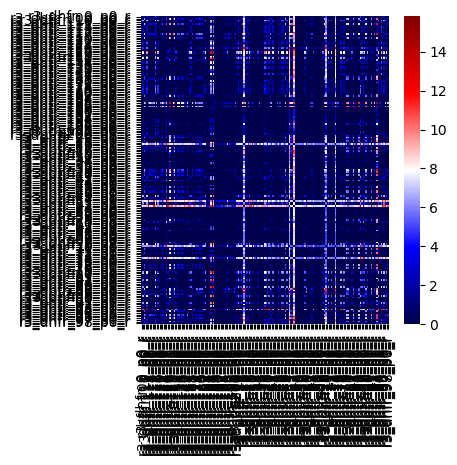

In [ ]:
scores = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/dhfr/rep_3/rad_1.8/pairs_min_dist.txt'
list_entries= '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/dhfr/rep_3/rad_1.8/list_pocket_entries.txt'
sym_matrix_min_dist, axes_labels = compute_scores_sym_matrix(scores, list_entries)
score_max = sym_matrix_min_dist.max() 
print(score_max)
fig, (ax1) = plt.subplots(1, figsize=(4, 4))
sns.heatmap(sym_matrix_min_dist,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)



/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 4


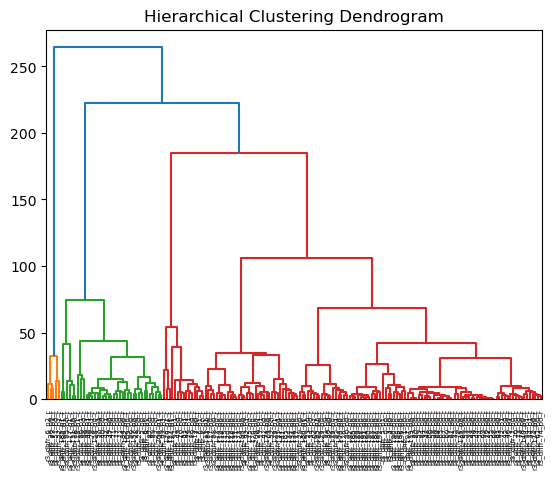

0 r3_dhfr_26_p0_r 202.57941304499997
0 r3_dhfr_51_p0_r 280.77448428883326
0 r3_dhfr_52_p1_r 203.8269204466666
0 r3_dhfr_6_p2_r 202.94607170383352
0 r3_dhfr_73_p1_r 214.95726719233326
1 r3_dhfr_109_p0_r 262.6054344318335
1 r3_dhfr_111_p0_r 333.5084199051665
1 r3_dhfr_117_p1_r 220.43106004050014
1 r3_dhfr_118_p1_r 376.98086979483315
1 r3_dhfr_157_p0_r 239.36991945933337
1 r3_dhfr_158_p0_r 231.42387808166654
1 r3_dhfr_182_p0_r 226.9539623545
1 r3_dhfr_185_p1_r 260.2703262071667
1 r3_dhfr_186_p1_r 320.1035989198332
1 r3_dhfr_200_p1_r 213.83265562116688
1 r3_dhfr_20_p0_r 309.8173334145001
1 r3_dhfr_25_p0_r 228.77414254200008
1 r3_dhfr_27_p0_r 253.151497881667
1 r3_dhfr_28_p0_r 248.15619308866658
1 r3_dhfr_38_p0_r 270.4409042771666
1 r3_dhfr_39_p0_r 297.46552623850005
1 r3_dhfr_40_p0_r 362.33500212266637
1 r3_dhfr_42_p1_r 243.84703091550003
1 r3_dhfr_45_p1_r 317.4625220976666
1 r3_dhfr_46_p1_r 252.52288497633336
1 r3_dhfr_47_p0_r 311.01375079266654
1 r3_dhfr_49_p1_r 204.19292213866666
1 r3_d

In [73]:
threshold = 150
clusters_all_pockets=compute_clusters(sym_matrix_min_dist, threshold,axes_labels,cluster)

volumes_file = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/dhfr/rep_3/rad_1.8/pockets_r_volumes.txt'


pockets_volumes = []
for i in range(len(clusters_all_pockets)):
    pocket_volumes= compute_volumes_pockets(volumes_file, clusters_all_pockets[i])
    pockets_volumes.append(pocket_volumes)
    for pocket in pocket_volumes:
        print(i,pocket[0],pocket[1])

Others - 200 snapshots

In [ ]:
scores = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/dot1l/rep_1/pairs_min_dist.txt'
list_entries= '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/dot1l/rep_1/list_pocket_entries.txt'
sym_matrix_min_dist, axes_labels = compute_scores_sym_matrix(scores, list_entries)
score_max = sym_matrix_min_dist.max() 
print(score_max)
fig, (ax1) = plt.subplots(1, figsize=(4, 4))
sns.heatmap(sym_matrix_min_dist,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)



['r1_dot1l_opes0_p0_r', 'r1_dot1l_opes100_p0_r', 'r1_dot1l_opes100_p1_r', 'r1_dot1l_opes100_p2_r', 'r1_dot1l_opes101_p0_r', 'r1_dot1l_opes101_p1_r', 'r1_dot1l_opes102_p0_r', 'r1_dot1l_opes102_p1_r', 'r1_dot1l_opes102_p2_r', 'r1_dot1l_opes102_p3_r', 'r1_dot1l_opes103_p0_r', 'r1_dot1l_opes103_p1_r', 'r1_dot1l_opes104_p0_r', 'r1_dot1l_opes104_p1_r', 'r1_dot1l_opes105_p0_r', 'r1_dot1l_opes105_p1_r', 'r1_dot1l_opes105_p2_r', 'r1_dot1l_opes105_p3_r', 'r1_dot1l_opes106_p0_r', 'r1_dot1l_opes106_p1_r', 'r1_dot1l_opes106_p2_r', 'r1_dot1l_opes107_p0_r', 'r1_dot1l_opes107_p1_r', 'r1_dot1l_opes107_p2_r', 'r1_dot1l_opes108_p0_r', 'r1_dot1l_opes108_p1_r', 'r1_dot1l_opes108_p2_r', 'r1_dot1l_opes109_p0_r', 'r1_dot1l_opes109_p1_r', 'r1_dot1l_opes109_p2_r', 'r1_dot1l_opes10_p0_r', 'r1_dot1l_opes10_p1_r', 'r1_dot1l_opes110_p0_r', 'r1_dot1l_opes110_p1_r', 'r1_dot1l_opes110_p2_r', 'r1_dot1l_opes110_p3_r', 'r1_dot1l_opes110_p4_r', 'r1_dot1l_opes111_p0_r', 'r1_dot1l_opes111_p1_r', 'r1_dot1l_opes111_p2_r', 'r1

KeyboardInterrupt: 

/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 4


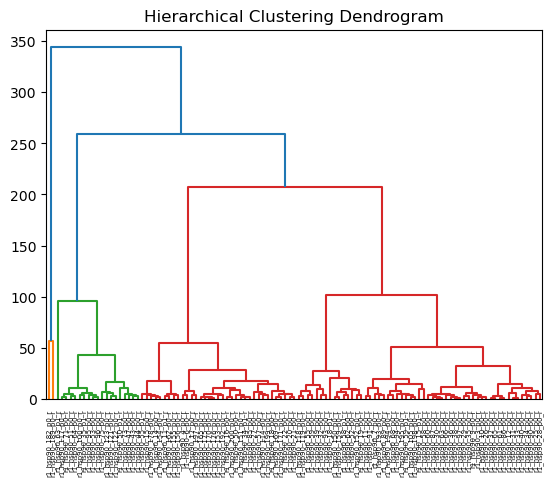

0 r1_hsp90_182_p0_r 200.9517891993334
0 r1_hsp90_189_p0_r 227.1106664056665
1 r1_hsp90_100_p0_r 252.52177148066653
1 r1_hsp90_117_p0_r 248.54960709599965
1 r1_hsp90_121_p0_r 214.38477380916652
1 r1_hsp90_122_p0_r 269.0400628791667
1 r1_hsp90_123_p0_r 255.0646806095001
1 r1_hsp90_35_p1_r 214.1434359421665
1 r1_hsp90_43_p0_r 242.21750446699994
1 r1_hsp90_44_p0_r 292.2206416698333
1 r1_hsp90_47_p0_r 207.58165138916652
1 r1_hsp90_50_p1_r 200.73212249733314
1 r1_hsp90_51_p0_r 321.1734832774996
1 r1_hsp90_53_p0_r 220.9042422641665
1 r1_hsp90_63_p1_r 205.8197663855
1 r1_hsp90_64_p0_r 555.9865671870003
1 r1_hsp90_71_p0_r 200.1011176258333
1 r1_hsp90_73_p0_r 202.45890485699988
1 r1_hsp90_75_p0_r 244.49419076483332
1 r1_hsp90_95_p0_r 268.54745984949983
1 r1_hsp90_96_p0_r 241.47823808683307
2 r1_hsp90_114_p0_r 237.03875592399982
2 r1_hsp90_11_p1_r 214.17421736450007
2 r1_hsp90_14_p0_r 335.6741246815002
2 r1_hsp90_151_p0_r 298.8837632599999
2 r1_hsp90_153_p0_r 488.464511212
2 r1_hsp90_154_p0_r 335

In [80]:
threshold = 150
clusters_all_pockets=compute_clusters(sym_matrix_min_dist, threshold,axes_labels,cluster)

volumes_file = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/pyvol_example/hsp90/rep_1/outputs_1.8/pockets_r_volumes.txt'


pockets_volumes = []
for i in range(len(clusters_all_pockets)):
    pocket_volumes= compute_volumes_pockets(volumes_file, clusters_all_pockets[i])
    pockets_volumes.append(pocket_volumes)
    for pocket in pocket_volumes:
        print(i,pocket[0],pocket[1])

In [20]:
import numpy as np
from itertools import combinations_with_replacement

def get_pairs(arr):
    return list(combinations_with_replacement(arr, 2))

def compute_scores_sym_matrix_eff(scores_file, list_entries_file):
    # Read the entry labels
    with open(list_entries_file) as f:
        entry_labels = f.read().splitlines()

    dim = len(entry_labels)
    label_to_idx = {label: idx for idx, label in enumerate(entry_labels)}

    # Initialize the symmetric matrix
    sym_matrix = np.zeros((dim, dim))

    # Build a dictionary for fast lookup
    scores_dict = {}
    with open(scores_file) as f:
        for line in f:
            p1, p2, score = line.strip().split()
            score = float(score)
            scores_dict[(p1, p2)] = score
            scores_dict[(p2, p1)] = score  # Enforce symmetry in lookup

    # Get pairs (upper triangle including diagonal)
    pairs_entries = get_pairs(entry_labels)

    # Fill the matrix using pairs
    for (p1, p2) in pairs_entries:
        if (p1, p2) in scores_dict:
            i = label_to_idx[p1]
            j = label_to_idx[p2]
            sym_matrix[i, j] = scores_dict[(p1, p2)]
            sym_matrix[j, i] = scores_dict[(p1, p2)]  # Enforce symmetry
        else:
            # Optional: Handle missing pairs if needed (e.g., assign zero or NaN)
            pass

    return sym_matrix, entry_labels

def compute_volumes_pockets(volumes_file, list_entries):
    volumes_file = open(volumes_file)
    volumes_pockets = volumes_file.read().splitlines()
    entry_labels = list_entries
    
    #Derive dimension of the score matrix from the list of points
    dim = len(entry_labels)
    
    axes_labels = []
    for label in entry_labels:
        axes_labels.append(label)

    vol_pockets = []

    for j in entry_labels:
        for line in volumes_pockets:
            p = line.split()
            pocket_entry = p[0]
            pocket_volume = p[1] 
            if j==pocket_entry :
                vol_pockets.append((pocket_entry,pocket_volume))   

    return vol_pockets



42.70166762585441


<AxesSubplot:>

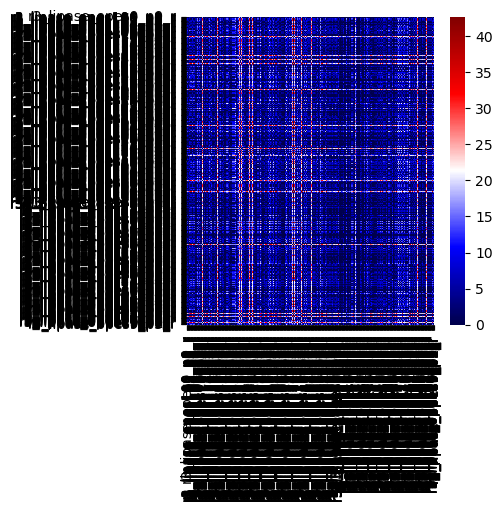

In [44]:
scores = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/lipase/rep_3/pairs_min_dist.txt'
list_entries= '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/lipase/rep_3/list_pocket_entries.txt'
sym_matrix_min_dist, axes_labels = compute_scores_sym_matrix_eff(scores, list_entries)
score_max = sym_matrix_min_dist.max() 
print(score_max)
fig, (ax1) = plt.subplots(1, figsize=(4, 4))
sns.heatmap(sym_matrix_min_dist,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)


/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 5


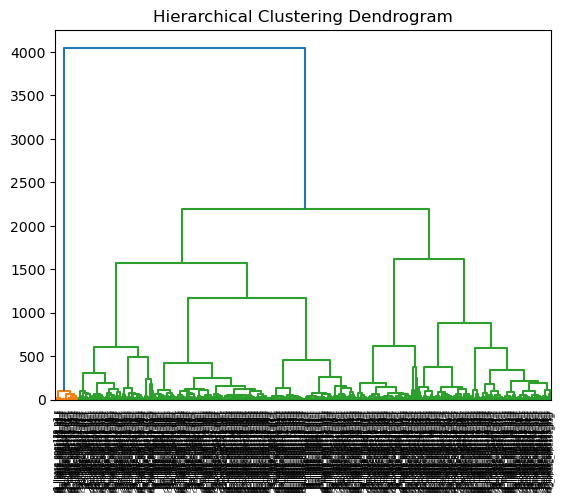

0 r3_lipase_opes107_p2_r 285.3665595326666
0 r3_lipase_opes110_p2_r 288.91753429283335
0 r3_lipase_opes118_p2_r 332.59631631583335
0 r3_lipase_opes119_p3_r 241.7446546496667
0 r3_lipase_opes120_p3_r 244.98481820383336
0 r3_lipase_opes123_p3_r 278.173352986
0 r3_lipase_opes137_p4_r 200.4569705551667
0 r3_lipase_opes139_p2_r 252.68923639083337
0 r3_lipase_opes141_p2_r 238.13425869950004
0 r3_lipase_opes146_p2_r 203.0512036765
0 r3_lipase_opes149_p2_r 262.0322099176667
0 r3_lipase_opes161_p3_r 240.11153926516667
0 r3_lipase_opes162_p3_r 334.91262487883336
0 r3_lipase_opes165_p5_r 244.94360157233336
0 r3_lipase_opes174_p2_r 269.48809990566673
0 r3_lipase_opes175_p4_r 202.64027539383335
0 r3_lipase_opes179_p3_r 239.9187308125
0 r3_lipase_opes181_p4_r 241.11623689183332
0 r3_lipase_opes184_p3_r 219.69754456833334
0 r3_lipase_opes188_p4_r 258.4208151948333
0 r3_lipase_opes193_p3_r 250.85893594433333
0 r3_lipase_opes194_p3_r 290.1350422726667
0 r3_lipase_opes199_p4_r 212.48690303549998
0 r3_li

In [45]:
threshold = 1200
clusters_all_pockets=compute_clusters(sym_matrix_min_dist, threshold,axes_labels,cluster)

volumes_file = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/lipase/rep_3/pockets_r_volume.txt'

pockets_volumes = []
for i in range(len(clusters_all_pockets)):
    pocket_volumes= compute_volumes_pockets(volumes_file, clusters_all_pockets[i])
    pockets_volumes.append(pocket_volumes)
    for pocket in pocket_volumes:
        print(i,pocket[0],pocket[1])

45.4218664610067


<AxesSubplot:>

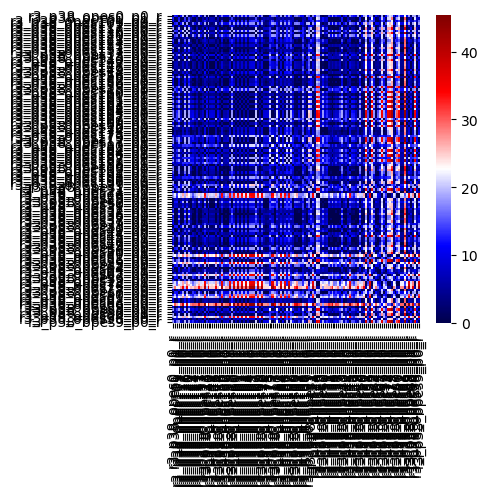

In [49]:
scores = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/p38/rep_3/pairs_min_dist.txt'
list_entries= '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/p38/rep_3/list_pocket_entries.txt'
sym_matrix_min_dist, axes_labels = compute_scores_sym_matrix_eff(scores, list_entries)
score_max = sym_matrix_min_dist.max() 
print(score_max)
fig, (ax1) = plt.subplots(1, figsize=(4, 4))
sns.heatmap(sym_matrix_min_dist,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)


/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 4


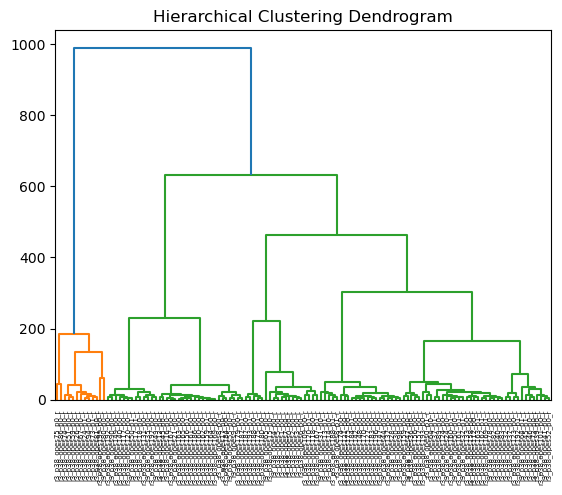

0 r3_p38_opes199_p0_r 206.34763220649998
0 r3_p38_opes24_p1_r 250.44284198799994
0 r3_p38_opes26_p0_r 236.7847767796666
0 r3_p38_opes51_p0_r 205.41799921316655
0 r3_p38_opes59_p0_r 226.68336616750003
0 r3_p38_opes67_p0_r 215.09089997049978
0 r3_p38_opes73_p1_r 283.14156609816655
0 r3_p38_opes74_p0_r 210.5745131918333
0 r3_p38_opes75_p0_r 247.71312600800002
0 r3_p38_opes80_p0_r 317.43752903333325
0 r3_p38_opes81_p0_r 261.1543490226671
0 r3_p38_opes86_p0_r 232.11711059749996
0 r3_p38_opes94_p0_r 223.94896242600035
1 r3_p38_opes117_p0_r 205.55487718083342
1 r3_p38_opes120_p0_r 303.6432088603333
1 r3_p38_opes131_p0_r 214.63517420049993
1 r3_p38_opes13_p0_r 454.2628758885003
1 r3_p38_opes140_p0_r 217.79275226133336
1 r3_p38_opes149_p0_r 217.8053670081665
1 r3_p38_opes156_p1_r 513.2158215574997
1 r3_p38_opes159_p1_r 459.5766644243333
1 r3_p38_opes160_p0_r 380.7097045266664
1 r3_p38_opes161_p0_r 413.10411490616684
1 r3_p38_opes162_p0_r 481.29393365466694
1 r3_p38_opes163_p0_r 546.338039873
1 

In [52]:
threshold = 400
clusters_all_pockets=compute_clusters(sym_matrix_min_dist, threshold,axes_labels,cluster)

volumes_file = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/p38/rep_3/pockets_r_volume.txt'

pockets_volumes = []
for i in range(len(clusters_all_pockets)):
    pocket_volumes= compute_volumes_pockets(volumes_file, clusters_all_pockets[i])
    pockets_volumes.append(pocket_volumes)
    for pocket in pocket_volumes:
        print(i,pocket[0],pocket[1])

46.84062277990602


<AxesSubplot:>

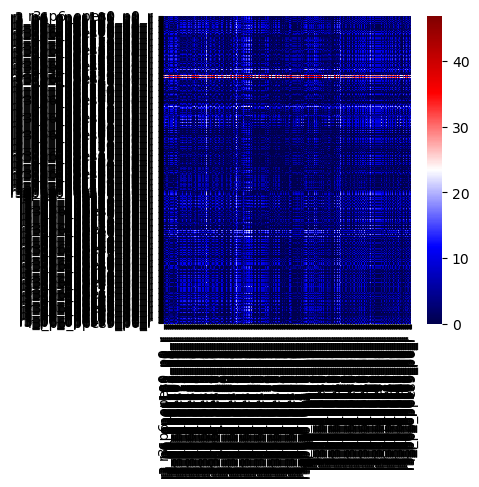

In [61]:
scores = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/p6/rad_1.8/rep_3/pairs_min_dist.txt'
list_entries= '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/p6/rad_1.8/rep_3/list_pocket_entries.txt'
sym_matrix_min_dist, axes_labels = compute_scores_sym_matrix_eff(scores, list_entries)
score_max = sym_matrix_min_dist.max() 
print(score_max)
fig, (ax1) = plt.subplots(1, figsize=(4, 4))
sns.heatmap(sym_matrix_min_dist,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)

/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 7


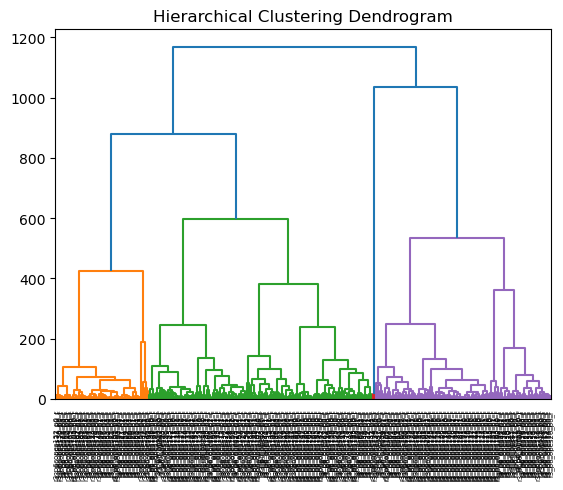

0 r3_p6_opes100_p0_r 347.02450187150015
0 r3_p6_opes101_p2_r 219.8428924578333
0 r3_p6_opes102_p1_r 339.44408628700006
0 r3_p6_opes103_p0_r 301.3096523555
0 r3_p6_opes104_p0_r 429.07474099
0 r3_p6_opes105_p0_r 365.26948325783354
0 r3_p6_opes107_p0_r 351.61940593683335
0 r3_p6_opes108_p0_r 277.6797749861665
0 r3_p6_opes109_p0_r 272.3423894841664
0 r3_p6_opes127_p1_r 269.0546447470003
0 r3_p6_opes130_p0_r 443.37193555633326
0 r3_p6_opes134_p1_r 333.9140619198335
0 r3_p6_opes142_p2_r 321.3391978966665
0 r3_p6_opes144_p2_r 323.3711191306668
0 r3_p6_opes152_p0_r 460.05742986300015
0 r3_p6_opes21_p2_r 283.58407455666674
0 r3_p6_opes24_p1_r 229.44956435666708
0 r3_p6_opes26_p1_r 231.21316302400024
0 r3_p6_opes27_p1_r 236.1772318016664
0 r3_p6_opes44_p1_r 226.07716867216655
0 r3_p6_opes46_p0_r 338.3160704728334
0 r3_p6_opes47_p1_r 400.8162742673333
0 r3_p6_opes48_p0_r 321.89676487549985
0 r3_p6_opes49_p1_r 339.7131227245001
0 r3_p6_opes50_p1_r 307.73820149583327
0 r3_p6_opes51_p1_r 449.9542743

In [62]:
threshold = 400
clusters_all_pockets=compute_clusters(sym_matrix_min_dist, threshold,axes_labels,cluster)

volumes_file = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/p6/rad_1.8/rep_3/pockets_r_volume.txt'

pockets_volumes = []
for i in range(len(clusters_all_pockets)):
    pocket_volumes= compute_volumes_pockets(volumes_file, clusters_all_pockets[i])
    pockets_volumes.append(pocket_volumes)
    for pocket in pocket_volumes:
        print(i,pocket[0],pocket[1])

27.07405312008674


<AxesSubplot:>

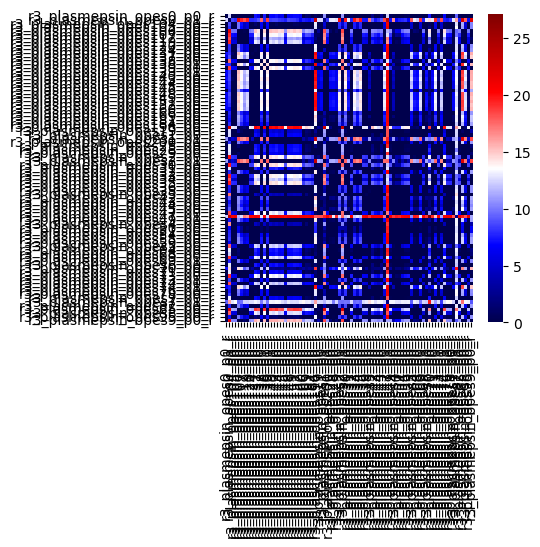

In [68]:
scores = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/plasmepsin/rep_3/pairs_min_dist.txt'
list_entries= '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/plasmepsin/rep_3/list_pocket_entries.txt'
sym_matrix_min_dist, axes_labels = compute_scores_sym_matrix_eff(scores, list_entries)
score_max = sym_matrix_min_dist.max() 
print(score_max)
fig, (ax1) = plt.subplots(1, figsize=(4, 4))
sns.heatmap(sym_matrix_min_dist,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)

/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 5


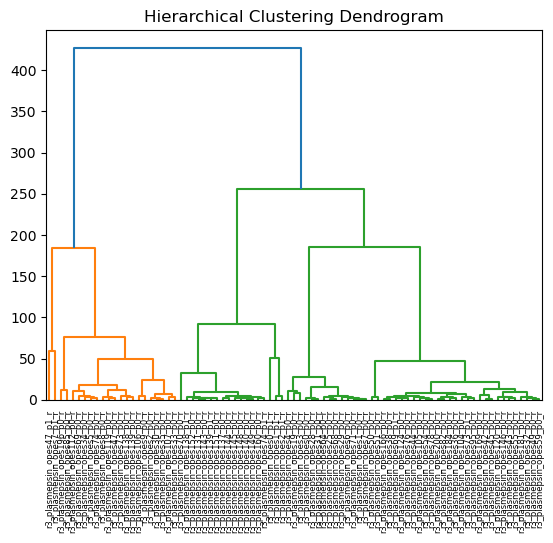

0 r3_plasmepsin_opes47_p1_r 209.9533722028334
0 r3_plasmepsin_opes7_p1_r 208.60866624233344
1 r3_plasmepsin_opes106_p0_r 343.2168794835
1 r3_plasmepsin_opes107_p0_r 322.5638674513334
1 r3_plasmepsin_opes112_p0_r 319.78826757183333
1 r3_plasmepsin_opes119_p0_r 331.4167282055
1 r3_plasmepsin_opes138_p0_r 662.5491965258334
1 r3_plasmepsin_opes139_p0_r 554.9617156218334
1 r3_plasmepsin_opes196_p0_r 241.53559476783335
1 r3_plasmepsin_opes2_p0_r 276.663757829
1 r3_plasmepsin_opes30_p0_r 489.8921358646665
1 r3_plasmepsin_opes33_p0_r 473.761550986
1 r3_plasmepsin_opes34_p0_r 703.5440622288334
1 r3_plasmepsin_opes35_p0_r 323.68463812449994
1 r3_plasmepsin_opes47_p0_r 240.9119632858333
1 r3_plasmepsin_opes5_p0_r 505.4052312288333
1 r3_plasmepsin_opes69_p0_r 541.3277005256667
1 r3_plasmepsin_opes73_p0_r 235.85767532233322
1 r3_plasmepsin_opes74_p0_r 535.2398928908333
1 r3_plasmepsin_opes85_p0_r 203.8254277115
1 r3_plasmepsin_opes8_p0_r 201.71005558800002
1 r3_plasmepsin_opes9_p0_r 287.07751916983

In [70]:
threshold = 150
clusters_all_pockets=compute_clusters(sym_matrix_min_dist, threshold,axes_labels,cluster)

volumes_file = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/plasmepsin/rep_3/pockets_r_volume.txt'

pockets_volumes = []
for i in range(len(clusters_all_pockets)):
    pocket_volumes= compute_volumes_pockets(volumes_file, clusters_all_pockets[i])
    pockets_volumes.append(pocket_volumes)
    for pocket in pocket_volumes:
        print(i,pocket[0],pocket[1])

30.307149881291437


<AxesSubplot:>

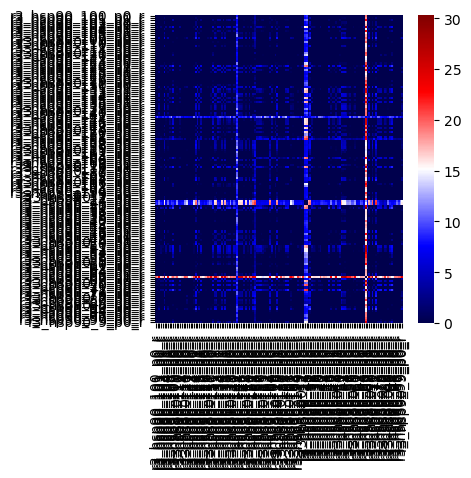

In [82]:
scores = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/hsp90/rep_3/rad_1.8/pairs_min_dist.txt'
list_entries= '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/hsp90/rep_3/rad_1.8/list_pocket_entries.txt'
sym_matrix_min_dist, axes_labels = compute_scores_sym_matrix_eff(scores, list_entries)
score_max = sym_matrix_min_dist.max() 
print(score_max)
fig, (ax1) = plt.subplots(1, figsize=(4, 4))
sns.heatmap(sym_matrix_min_dist,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)

/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 5


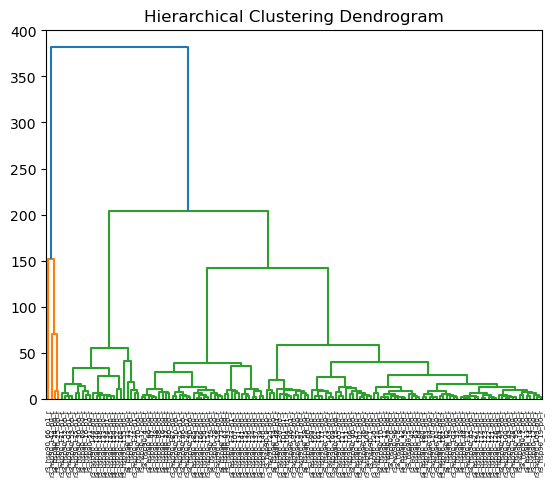

0 r3_hsp90_142_p0_r 95730.436241913
0 r3_hsp90_24_p0_r 409.43945254050016
0 r3_hsp90_25_p0_r 227.7831423766666
1 r3_hsp90_66_p1_r 214.15340711049987
2 r3_hsp90_103_p1_r 211.49099151733336
2 r3_hsp90_124_p1_r 262.1524166874999
2 r3_hsp90_131_p1_r 221.55688954250004
2 r3_hsp90_133_p0_r 252.77821823700015
2 r3_hsp90_134_p1_r 220.49019747833336
2 r3_hsp90_135_p1_r 225.28692774833326
2 r3_hsp90_144_p0_r 250.56354022833344
2 r3_hsp90_145_p0_r 262.7749826280001
2 r3_hsp90_146_p0_r 301.6438315441668
2 r3_hsp90_148_p0_r 218.76951019000018
2 r3_hsp90_150_p0_r 305.2165701271666
2 r3_hsp90_152_p0_r 305.39638497233324
2 r3_hsp90_155_p0_r 226.16417208449985
2 r3_hsp90_164_p0_r 311.4621074470001
2 r3_hsp90_16_p1_r 255.34933154866658
2 r3_hsp90_30_p0_r 378.3499674743334
2 r3_hsp90_31_p0_r 212.0944757355002
2 r3_hsp90_51_p0_r 204.62634700400008
2 r3_hsp90_52_p0_r 303.5900674623332
2 r3_hsp90_53_p0_r 296.98040314833315
2 r3_hsp90_69_p0_r 305.366243733
2 r3_hsp90_70_p0_r 220.04746576083335
2 r3_hsp90_72_

In [83]:
threshold = 100
clusters_all_pockets=compute_clusters(sym_matrix_min_dist, threshold,axes_labels,cluster)

volumes_file = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/hsp90/rep_3/rad_1.8/pockets_r_volume.txt'

pockets_volumes = []
for i in range(len(clusters_all_pockets)):
    pocket_volumes= compute_volumes_pockets(volumes_file, clusters_all_pockets[i])
    pockets_volumes.append(pocket_volumes)
    for pocket in pocket_volumes:
        print(i,pocket[0],pocket[1])

34.84523185150105


<AxesSubplot:>

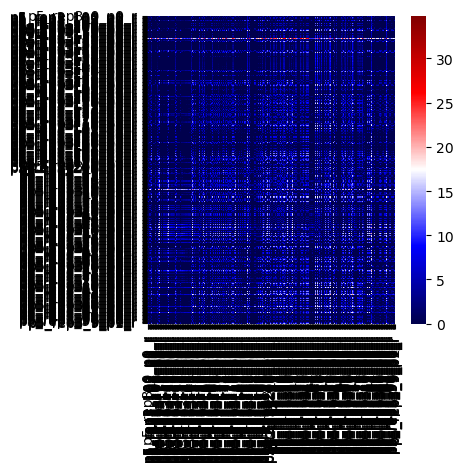

In [92]:
scores = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/p5/rep_3/pairs_min_dist.txt'
list_entries= '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/p5/rep_3/list_pocket_entries.txt'
sym_matrix_min_dist, axes_labels = compute_scores_sym_matrix_eff(scores, list_entries)
score_max = sym_matrix_min_dist.max() 
print(score_max)
fig, (ax1) = plt.subplots(1, figsize=(4, 4))
sns.heatmap(sym_matrix_min_dist,ax=ax1,vmin=0.0,vmax=score_max,cmap ='seismic',xticklabels=axes_labels,yticklabels=axes_labels)

/Users/gdiazleines/opt/miniconda3/envs/pisa-analysis/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


optimal number of clusters 4


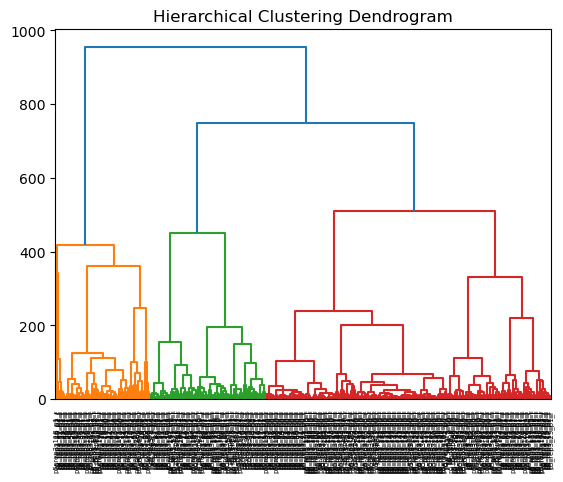

0 p5_rep3_102_p2_r 221.24308822216665
0 p5_rep3_10_p0_r 684.2561040008334
0 p5_rep3_118_p1_r 256.7718423656666
0 p5_rep3_11_p0_r 549.8685256939999
0 p5_rep3_12_p0_r 514.2944992258334
0 p5_rep3_12_p1_r 508.9007038661666
0 p5_rep3_14_p0_r 637.1852121719996
0 p5_rep3_158_p1_r 254.0248508446669
0 p5_rep3_159_p1_r 231.4504322503334
0 p5_rep3_15_p1_r 613.7829847536668
0 p5_rep3_160_p1_r 283.259873076666
0 p5_rep3_167_p3_r 286.8283725783332
0 p5_rep3_169_p2_r 310.8535118166668
0 p5_rep3_16_p1_r 583.7636879434996
0 p5_rep3_171_p0_r 543.5100224576669
0 p5_rep3_175_p1_r 343.6924940778333
0 p5_rep3_175_p2_r 203.31968513549978
0 p5_rep3_176_p1_r 561.5488345639999
0 p5_rep3_178_p3_r 229.12300540366655
0 p5_rep3_17_p0_r 648.6889009206667
0 p5_rep3_188_p2_r 212.90560655800027
0 p5_rep3_18_p0_r 468.3259025753335
0 p5_rep3_198_p2_r 300.1466406731668
0 p5_rep3_19_p0_r 503.1083541431668
0 p5_rep3_200_p2_r 272.7645463343333
0 p5_rep3_20_p0_r 691.903930588833
0 p5_rep3_20_p2_r 593.2293170043328
0 p5_rep3_2

In [93]:
threshold = 500
clusters_all_pockets=compute_clusters(sym_matrix_min_dist, threshold,axes_labels,cluster)

volumes_file = '/Users/gdiazleines/results/shape-retrieval/benchmarking/JandJ/targets_results/p5/rep_3/pockets_r_volume.txt'

pockets_volumes = []
for i in range(len(clusters_all_pockets)):
    pocket_volumes= compute_volumes_pockets(volumes_file, clusters_all_pockets[i])
    pockets_volumes.append(pocket_volumes)
    for pocket in pocket_volumes:
        print(i,pocket[0],pocket[1])